<a href="https://colab.research.google.com/github/IG-Reagan/Product-Weight-Optimisation-to-Reduce-Giveaway_Causal-Inference-Analysis/blob/main/part_1_sc_weight_error_analysis_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Soft Cheese Weight Optimisation Project
### Part 1: Investigating the Causes of Weight Variations
#### Descriptive Analysis of results obtained from the Soft Cheese Weight Optimisation Experiment

##### Three (3) experiments were conducted to create equivalence classes and investigate how various setups in the AFE machine and acidification process may affect the cheese weights variation.

Experiment 1 (309441): Random number of curd tipping scrapes based on discretion of the AFE operator.

Experiment 2 (310141): ALPMA recommended method - allow curds to fill up to a marked height on the tipping scrapper then use only 2 scrapes (back and front movement) to fill the moulds.

Experiment 3 (310941): Extended ALPMA - allow curds to fill to a marked height on the tipping scrapper (like experiment 2) and then filling the trays by 2, 4 and 6 scrapes. i.e., 5 trays each with 2 scrapes, 4 scrapes and 6 scrapes.

Combining the records from all 3 experiments we have created a dataset of 1575 rows and 14 columns which has been analysed to investigate what factors affect weight variations in soft cheese (Button Mill) production.

 #### Step 1: Import Packages

In [ ]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

#### Step 2: Load and Explore General Structure of Dataset

In [ ]:
# Import the data and view the first few rows.

data = pd.read_csv(r'dataset.csv', index_col=0)
data.head(5)

prod_date  runnumber  vat_no  cheese_type  afe_height  tray_no  \
serial_no                                                                    
1          04/04/2023     309441       2  Button Mill         113        1   
2          04/04/2023     309441       2  Button Mill         113        1   
3          04/04/2023     309441       2  Button Mill         113        1   
4          04/04/2023     309441       2  Button Mill         113        1   
5          04/04/2023     309441       2  Button Mill         113        1   

          inner_or_outer  cheese_weight  tray_position tray_class  stack_no  \
serial_no                                                                     
1                  outer            190              1        top         1   
2                  outer            185              1        top         1   
3                  outer            184              1        top         1   
4                  outer            181              1        top         1   
5                  outer            190              1        top         1   

          stack_position no_of_scrapes  
serial_no                               
1                  front        random  
2                  front        random  
3                  front        random  
4                  front        random  
5                  front        random

The dataset has 14 columns including unique IDs (serial_no) and 13 features from the cheese weight experiments. Note that the target variable is cheese_weight while others are predictor variables.

In [ ]:
# Summary view of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1575 entries, 1 to 1575
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   prod_date       1575 non-null   object
 1   runnumber       1575 non-null   int64 
 2   vat_no          1575 non-null   int64 
 3   cheese_type     1575 non-null   object
 4   afe_height      1575 non-null   int64 
 5   tray_no         1575 non-null   int64 
 6   inner_or_outer  1575 non-null   object
 7   cheese_weight   1575 non-null   int64 
 8   tray_position   1575 non-null   int64 
 9   tray_class      1575 non-null   object
 10  stack_no        1575 non-null   int64 
 11  stack_position  1575 non-null   object
 12  no_of_scrapes   1575 non-null   object
dtypes: int64(7), object(6)
memory usage: 172.3+ KB


Variable types will be properly assigned to represent the nature of each feature. For example, vat_no should be an identifier for each vat used in the experiments.

In [ ]:
# Check the unique values present in each variable

# Select the categorical columns
check_columns = ['prod_date', 'vat_no', 'cheese_type', 'afe_height', 'tray_no', 'inner_or_outer', 'tray_position', 'tray_class', 'stack_no', 'stack_position', 'no_of_scrapes']

# Loop through each categorical column and print value counts
for column in check_columns:
    print(f"{column} - unique values: ", data[column].unique().tolist())
    print('-' * 80)

prod_date - unique values:  ['04/04/2023', '11/04/2023', '19/04/2023']
--------------------------------------------------------------------------------
vat_no - unique values:  [2]
--------------------------------------------------------------------------------
cheese_type - unique values:  ['Button Mill']
--------------------------------------------------------------------------------
afe_height - unique values:  [113, 108, 110]
--------------------------------------------------------------------------------
tray_no - unique values:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
--------------------------------------------------------------------------------
inner_or_outer - unique values:  ['outer', 'inner']
--------------------------------------------------------------------------------
tray_position - unique values:  [1, 5, 6, 9, 10, 2]
--------------------------------------------------------------------------------
tray_class - unique values:  ['top', 'mid', 'bottom']
------

Unique values for all the features are as expected, except vat_no suggesting that only vat 2 was used for all 3 experiments. Note this indicates that we only took readings from the 2nd vat of each production batch, it is not the ID that represents the vat in the sequential order of the 14 vats in the soft dairy. Another column would be added as vat_id which should take values between 1 - 14 in order to capture any case where production characteristics may vary from vat to vat (i.e. in the case of Experiment 1 performed on 4th Apr, vat_id 10 will be used, etc.). Details of vat_id per experiment can be found in the daily production records.

In [ ]:
# Check value count for each categorical / list feature

# Select the categorical columns
categorical_columns = ['cheese_type', 'afe_height', 'inner_or_outer', 'tray_position', 'tray_class', 'stack_no', 'stack_position', 'no_of_scrapes']

# Loop through each categorical column and print value counts
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())
    print('-' * 35)

Value counts for cheese_type:
cheese_type
Button Mill    1575
Name: count, dtype: int64
-----------------------------------
Value counts for afe_height:
afe_height
113    525
108    525
110    525
Name: count, dtype: int64
-----------------------------------
Value counts for inner_or_outer:
inner_or_outer
outer    900
inner    675
Name: count, dtype: int64
-----------------------------------
Value counts for tray_position:
tray_position
1     315
5     315
6     315
10    315
9     210
2     105
Name: count, dtype: int64
-----------------------------------
Value counts for tray_class:
tray_class
mid       735
bottom    525
top       315
Name: count, dtype: int64
-----------------------------------
Value counts for stack_no:
stack_no
1    525
2    525
3    525
Name: count, dtype: int64
-----------------------------------
Value counts for stack_position:
stack_position
inbetween    1225
front         350
Name: count, dtype: int64
-----------------------------------
Value counts for no_of

There's a good balance of classes in most of the features except stack_position and no_of_scrapes!

In [ ]:
# Check for duplicated variables

duplicated_vars = data.columns[data.columns.duplicated()]
if duplicated_vars.empty:
    print("No duplicated variables found.")
else:
    print("Duplicated variables: ", duplicated_vars)

No duplicated variables found.


In [ ]:
# Summarise the continuous values of column cheese_type because unique values of the float may be too many to print

data['cheese_weight'].describe()

count    1575.000000
mean      191.300952
std        11.514516
min       151.000000
25%       182.500000
50%       191.000000
75%       200.000000
max       228.000000
Name: cheese_weight, dtype: float64

##### Visual Exploration
The next visualisation shows different distributions of the dataset providing an "at a glance" summary of the data distributions.

In [ ]:
print('runnumbers: ', data['runnumber'].unique().tolist())

runnumbers:  [309441, 310141, 310941]


In [ ]:
# Convert 'runnumber' column from int to string

data_copy = data.copy()
data_copy['runnumber'] = data_copy['runnumber'].astype(str)

data_copy['runnumber'] = data_copy['runnumber'].replace('309441', 'exp_1')
data_copy['runnumber'] = data_copy['runnumber'].replace('310141', 'exp_2')
data_copy['runnumber'] = data_copy['runnumber'].replace('310941', 'exp_3')

print('runnumbers: ', data_copy['runnumber'].unique().tolist())
# data_copy.runnumber.info()

runnumbers:  ['exp_1', 'exp_2', 'exp_3']


<>:53: SyntaxWarning: invalid escape sequence '\P'
<>:53: SyntaxWarning: invalid escape sequence '\P'
C:\Users\giwa.iziomo\AppData\Local\Temp\ipykernel_29844\3655209782.py:53: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_5_data_structure.jpeg', dpi=350)


Data Summary with Charts


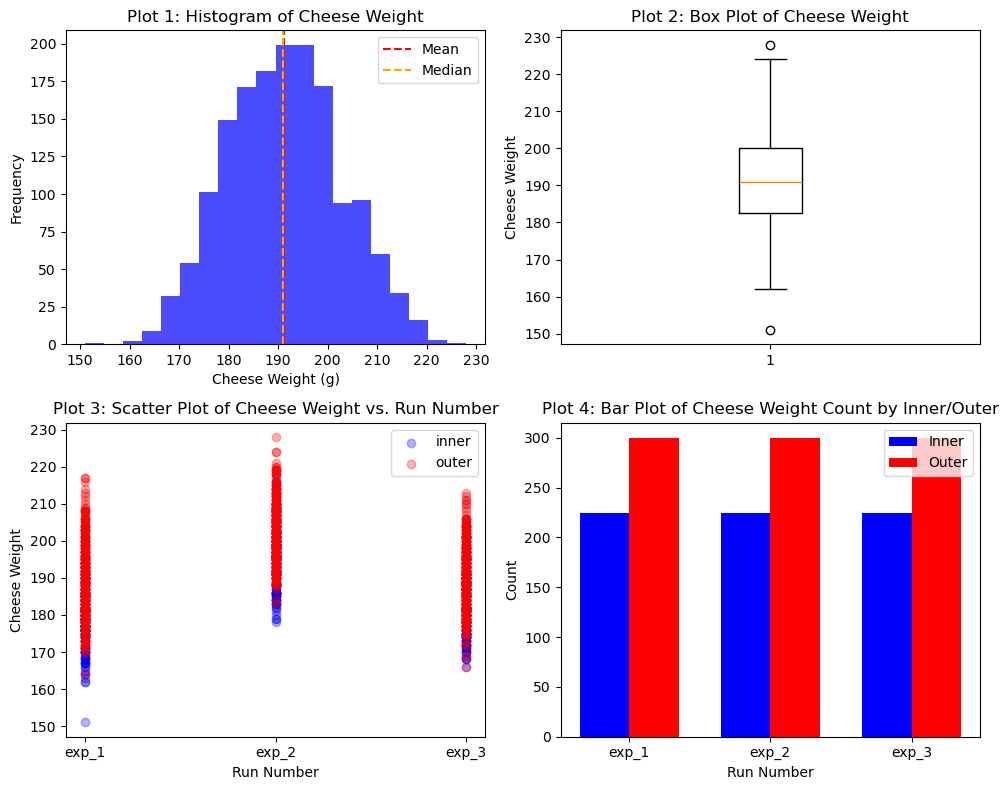

In [ ]:
# Create a grid of subplots for the cheese weight

print('Data Summary with Charts')

# Create a grid of subplots for the cheese weight
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot 1: Histogram
axes[0, 0].hist(data_copy['cheese_weight'], bins=20, color='blue', alpha=0.7)
axes[0, 0].axvline(data_copy['cheese_weight'].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
axes[0, 0].axvline(data_copy['cheese_weight'].median(), color='orange', linestyle='dashed', linewidth=1.5, label='Median')
axes[0, 0].set_title('Plot 1: Histogram of Cheese Weight')
axes[0, 0].set_xlabel('Cheese Weight (g)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Plot 2: Box plot
axes[0, 1].boxplot(data_copy['cheese_weight'])
axes[0, 1].set_title('Plot 2: Box Plot of Cheese Weight')
axes[0, 1].set_ylabel('Cheese Weight')

# Plot 3: Scatter plot
colors = {'inner': 'blue', 'outer': 'red'}
for group, color in colors.items():
    group_data = data_copy[data_copy['inner_or_outer'] == group]
    axes[1, 0].scatter(group_data['runnumber'], group_data['cheese_weight'], color=color, alpha=0.3, label=group)
axes[1, 0].set_title('Plot 3: Scatter Plot of Cheese Weight vs. Run Number')
axes[1, 0].set_xlabel('Run Number')
axes[1, 0].set_ylabel('Cheese Weight')
axes[1, 0].legend()

# Plot 4: Bar plot of Cheese Weight Records per runnumber and inner/outer
run_numbers = data_copy['runnumber'].unique()
inner_counts = []
outer_counts = []
for run_number in run_numbers:
    run_data_copy = data_copy[data_copy['runnumber'] == run_number]
    inner_counts.append(run_data_copy[run_data_copy['inner_or_outer'] == 'inner'].shape[0])
    outer_counts.append(run_data_copy[run_data_copy['inner_or_outer'] == 'outer'].shape[0])
width = 0.35
x = np.arange(len(run_numbers))
axes[1, 1].bar(x - width/2, inner_counts, width, color='blue', label='Inner')
axes[1, 1].bar(x + width/2, outer_counts, width, color='red', label='Outer')
axes[1, 1].set_title('Plot 4: Bar Plot of Cheese Weight Count by Inner/Outer')
axes[1, 1].set_xlabel('Run Number')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(run_numbers)
axes[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_5_data_structure.jpeg', dpi=350)
plt.show()


The plots above explore visually the structure of the complete dataset comprising all 3 experiments. The produced weights accross all 3 experiments shows a normal distribution with range from just over 150g up to about 230g.

Plot 1: Mean and Median at 191g, with mode within the same range, indicates that most cheeses produced across all 3 experiments are distributed around 191g.

Plot 2: Only a few outliers go below 160g and above 220g. Most cheeses fall within 185g and 200g, which supports the interpretation of plot 1.

Plot 3: Exp 1 produced the highest weight dispersion, Exp 2 the heaviest cheeses (175g - 230g) and Exp 3 the smallest spread.

Plot 4: Bar chart shows that all 3 experiments have the same data proportion between  inners and outers.

#### Step 3: Data Preprocessing

Convert some feature types into the appropriate variables and include new columns as explained in Step 1.

In [ ]:
# Check again the categories under vat_no

print('prod_date: ', data['prod_date'].unique().tolist())
print('vat_no: ', data['vat_no'].unique().tolist())

prod_date:  ['04/04/2023', '11/04/2023', '19/04/2023']
vat_no:  [2]


In [ ]:
 # Add new column for vat position

for i, row in data.iterrows():
    if row['prod_date'] == '04/04/2023':
        data.at[i, 'vat_position'] = '10'
    elif row['prod_date'] == '11/04/2023':
        data.at[i, 'vat_position'] = '13'
    elif row['prod_date'] == '19/04/2023':
        data.at[i, 'vat_position'] = '2'
    else: pass

print('vat_position: ', data['vat_position'].unique().tolist())


# Add new column for experiment names; exp_1, exp_2 and exp_3

for i, row in data.iterrows():
    if row['prod_date'] == '04/04/2023':
        data.at[i, 'exp_num'] = 'exp_1'
    elif row['prod_date'] == '11/04/2023':
        data.at[i, 'exp_num'] = 'exp_2'
    elif row['prod_date'] == '19/04/2023':
        data.at[i, 'exp_num'] = 'exp_3'
    else: pass

print('exp_num: ', data['exp_num'].unique().tolist())
data.head(2)

vat_position:  ['10', '13', '2']
exp_num:  ['exp_1', 'exp_2', 'exp_3']


prod_date  runnumber  vat_no  cheese_type  afe_height  tray_no  \
serial_no                                                                    
1          04/04/2023     309441       2  Button Mill         113        1   
2          04/04/2023     309441       2  Button Mill         113        1   

          inner_or_outer  cheese_weight  tray_position tray_class  stack_no  \
serial_no                                                                     
1                  outer            190              1        top         1   
2                  outer            185              1        top         1   

          stack_position no_of_scrapes vat_position exp_num  
serial_no                                                    
1                  front        random           10   exp_1  
2                  front        random           10   exp_1

#### Step 4: Exploratory Data Analysis (EDA)

Understand the general associations / relationships between the variables and find out what variables may have an impact on the target 'cheese_weight'. This will include descriptive visualisations, statistical inferences and correlation heatmaps.

In [ ]:
# Describe numerical varaibles in the dataset: show statistical description

data.describe().T

count           mean         std       min       25%  \
runnumber      1575.0  310174.333333  613.020518  309441.0  309441.0   
vat_no         1575.0       2.000000    0.000000       2.0       2.0   
afe_height     1575.0     110.333333    2.055457     108.0     108.0   
tray_no        1575.0       8.000000    4.321866       1.0       4.0   
cheese_weight  1575.0     191.300952   11.514516     151.0     182.5   
tray_position  1575.0       5.733333    3.256115       1.0       2.0   
stack_no       1575.0       2.000000    0.816756       1.0       1.0   

                    50%       75%       max  
runnumber      310141.0  310941.0  310941.0  
vat_no              2.0       2.0       2.0  
afe_height        110.0     113.0     113.0  
tray_no             8.0      12.0      15.0  
cheese_weight     191.0     200.0     228.0  
tray_position       6.0       9.0      10.0  
stack_no            2.0       3.0       3.0

Average and median cheese weight aligns with histogram in Step 2. The 25th - 75th percentile shows that most cheese weights fall between 182.5 and 200 grams.

#### 4a. Explore Cheese Weights vs number of scrapes

Compare weights from all 3 experiments; Experiment 1: random scrapes; Experiment 2: only 2 scrapes (ALPMA method); Experiment 3: 2, 4 and 6 scrapes.

In [ ]:
# Create separate dataset for each experiment

data_exp_1 = data[data['exp_num'] == 'exp_1']
data_exp_2 = data[data['exp_num'] == 'exp_2']
data_exp_3 = data[data['exp_num'] == 'exp_3']

data_exp_3.head(2)

prod_date  runnumber  vat_no  cheese_type  afe_height  tray_no  \
serial_no                                                                    
1051       19/04/2023     310941       2  Button Mill         110        1   
1052       19/04/2023     310941       2  Button Mill         110        1   

          inner_or_outer  cheese_weight  tray_position tray_class  stack_no  \
serial_no                                                                     
1051               outer            186             10     bottom         1   
1052               outer            184             10     bottom         1   

          stack_position no_of_scrapes vat_position exp_num  
serial_no                                                    
1051           inbetween             2            2   exp_3  
1052           inbetween             2            2   exp_3

##### 4a.1. Use Normal Distribution Curves to compare distributions between the 3 experiments

<>:67: SyntaxWarning: invalid escape sequence '\P'
<>:67: SyntaxWarning: invalid escape sequence '\P'
C:\Users\giwa.iziomo\AppData\Local\Temp\ipykernel_29844\50610135.py:67: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_6_normal_dist_exp_1_2.jpeg', dpi=350)


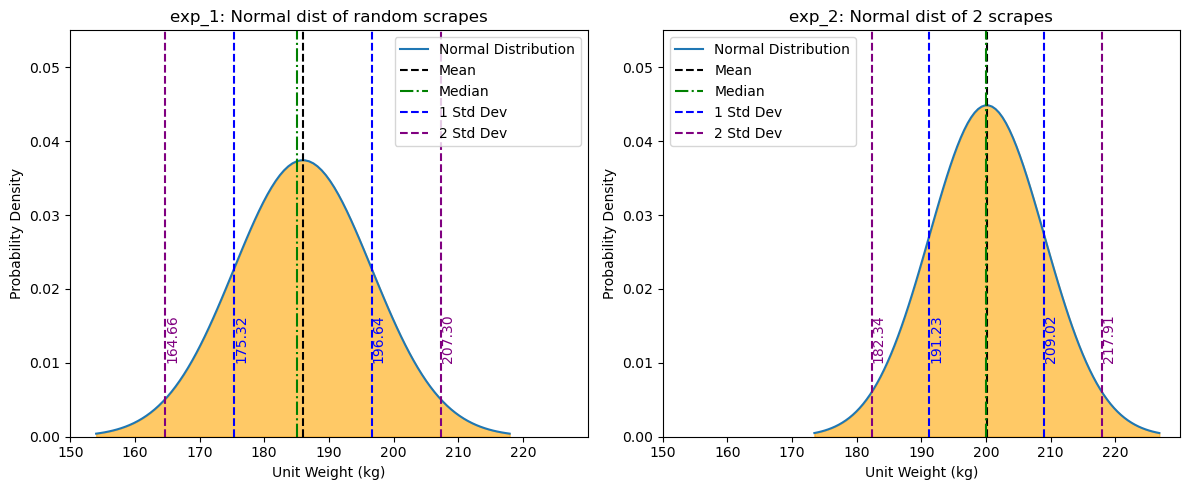

In [ ]:
# Plot normal distribution curve for exp 1 and 2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting for exp_1
ax1 = axes[0]
ax1.set_title('exp_1: Normal dist of random scrapes')

mu_exp_1, std_exp_1 = stats.norm.fit(data_exp_1['cheese_weight'])
x_exp_1 = np.linspace(mu_exp_1 - 3*std_exp_1, mu_exp_1 + 3*std_exp_1, 100)
pdf_exp_1 = stats.norm.pdf(x_exp_1, mu_exp_1, std_exp_1)

ax1.plot(x_exp_1, pdf_exp_1, label='Normal Distribution')
ax1.fill_between(x_exp_1, pdf_exp_1, 0, alpha=0.6, color='orange')
ax1.axvline(np.mean(data_exp_1['cheese_weight']), color='black', linestyle='--', label='Mean')
ax1.axvline(np.median(data_exp_1['cheese_weight']), color='green', linestyle='-.', label='Median')
ax1.axvline(mu_exp_1 - std_exp_1, color='blue', linestyle='--', label='1 Std Dev')
ax1.axvline(mu_exp_1 + std_exp_1, color='blue', linestyle='--')
ax1.axvline(mu_exp_1 - 2*std_exp_1, color='purple', linestyle='--', label='2 Std Dev')
ax1.axvline(mu_exp_1 + 2*std_exp_1, color='purple', linestyle='--')

# Add text annotations for standard deviation lines
ax1.text(mu_exp_1 - std_exp_1, 0.01, f'{mu_exp_1 - std_exp_1:.2f}', color='blue', rotation=90, va='bottom')
ax1.text(mu_exp_1 + std_exp_1, 0.01, f'{mu_exp_1 + std_exp_1:.2f}', color='blue', rotation=90, va='bottom')
ax1.text(mu_exp_1 - 2*std_exp_1, 0.01, f'{mu_exp_1 - 2*std_exp_1:.2f}', color='purple', rotation=90, va='bottom')
ax1.text(mu_exp_1 + 2*std_exp_1, 0.01, f'{mu_exp_1 + 2*std_exp_1:.2f}', color='purple', rotation=90, va='bottom')

ax1.legend()
ax1.set_xlabel('Unit Weight (kg)')
ax1.set_ylabel('Probability Density')
ax1.set(xlim=(150, 230), xticks=np.arange(150,230,10))
ax1.set(ylim=(0, 0.055), yticks=np.arange(0, 0.055, 0.01))


# Plotting for exp_2
ax2 = axes[1]
ax2.set_title('exp_2: Normal dist of 2 scrapes')

mu_exp_2, std_exp_2 = stats.norm.fit(data_exp_2['cheese_weight'])
x_exp_2 = np.linspace(mu_exp_2 - 3*std_exp_2, mu_exp_2 + 3*std_exp_2, 100)
pdf_exp_2 = stats.norm.pdf(x_exp_2, mu_exp_2, std_exp_2)

ax2.plot(x_exp_2, pdf_exp_2, label='Normal Distribution')
ax2.fill_between(x_exp_2, pdf_exp_2, 0, alpha=0.6, color='orange')
ax2.axvline(np.mean(data_exp_2['cheese_weight']), color='black', linestyle='--', label='Mean')
ax2.axvline(np.median(data_exp_2['cheese_weight']), color='green', linestyle='-.', label='Median')
ax2.axvline(mu_exp_2 - std_exp_2, color='blue', linestyle='--', label='1 Std Dev')
ax2.axvline(mu_exp_2 + std_exp_2, color='blue', linestyle='--')
ax2.axvline(mu_exp_2 - 2*std_exp_2, color='purple', linestyle='--', label='2 Std Dev')
ax2.axvline(mu_exp_2 + 2*std_exp_2, color='purple', linestyle='--')

# Add text annotations for standard deviation lines
ax2.text(mu_exp_2 - std_exp_2, 0.01, f'{mu_exp_2 - std_exp_2:.2f}', color='blue', rotation=90, va='bottom')
ax2.text(mu_exp_2 + std_exp_2, 0.01, f'{mu_exp_2 + std_exp_2:.2f}', color='blue', rotation=90, va='bottom')
ax2.text(mu_exp_2 - 2*std_exp_2, 0.01, f'{mu_exp_2 - 2*std_exp_2:.2f}', color='purple', rotation=90, va='bottom')
ax2.text(mu_exp_2 + 2*std_exp_2, 0.01, f'{mu_exp_2 + 2*std_exp_2:.2f}', color='purple', rotation=90, va='bottom')

ax2.legend()
ax2.set_xlabel('Unit Weight (kg)')
ax2.set_ylabel('Probability Density')
ax2.set(xlim=(150, 230), xticks=np.arange(150,230,10))
ax2.set(ylim=(0, 0.055), yticks=np.arange(0, 0.055, 0.01))

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_6_normal_dist_exp_1_2.jpeg', dpi=350)

# Show the plot
plt.show()

Both curves are presented with the same axes dimensions for easy comparison. As seen in Step 2 scatter plot, the cheeses were heavier in exp_2 (2 scrapes ALPMA) compared to exp_1 where the operator used their discretion to fill the moulds as they deemed fit from tray to tray. However, we can also see that exp_1 produced more dispersed weights compared to exp_2 which is undesirable.

In [ ]:
# Separate exp_3 into 3 sub datasets; 2 scrapes, 4 scrapes and 6 scrapes.

exp_3_2_scrapes = data_exp_3[data_exp_3['no_of_scrapes'] == '2']
exp_3_4_scrapes = data_exp_3[data_exp_3['no_of_scrapes'] == '4']
exp_3_6_scrapes = data_exp_3[data_exp_3['no_of_scrapes'] == '6']

<>:123: SyntaxWarning: invalid escape sequence '\P'
<>:123: SyntaxWarning: invalid escape sequence '\P'
C:\Users\giwa.iziomo\AppData\Local\Temp\ipykernel_29844\1618781824.py:123: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_7_normal_dist_exp_3.jpeg', dpi=350)


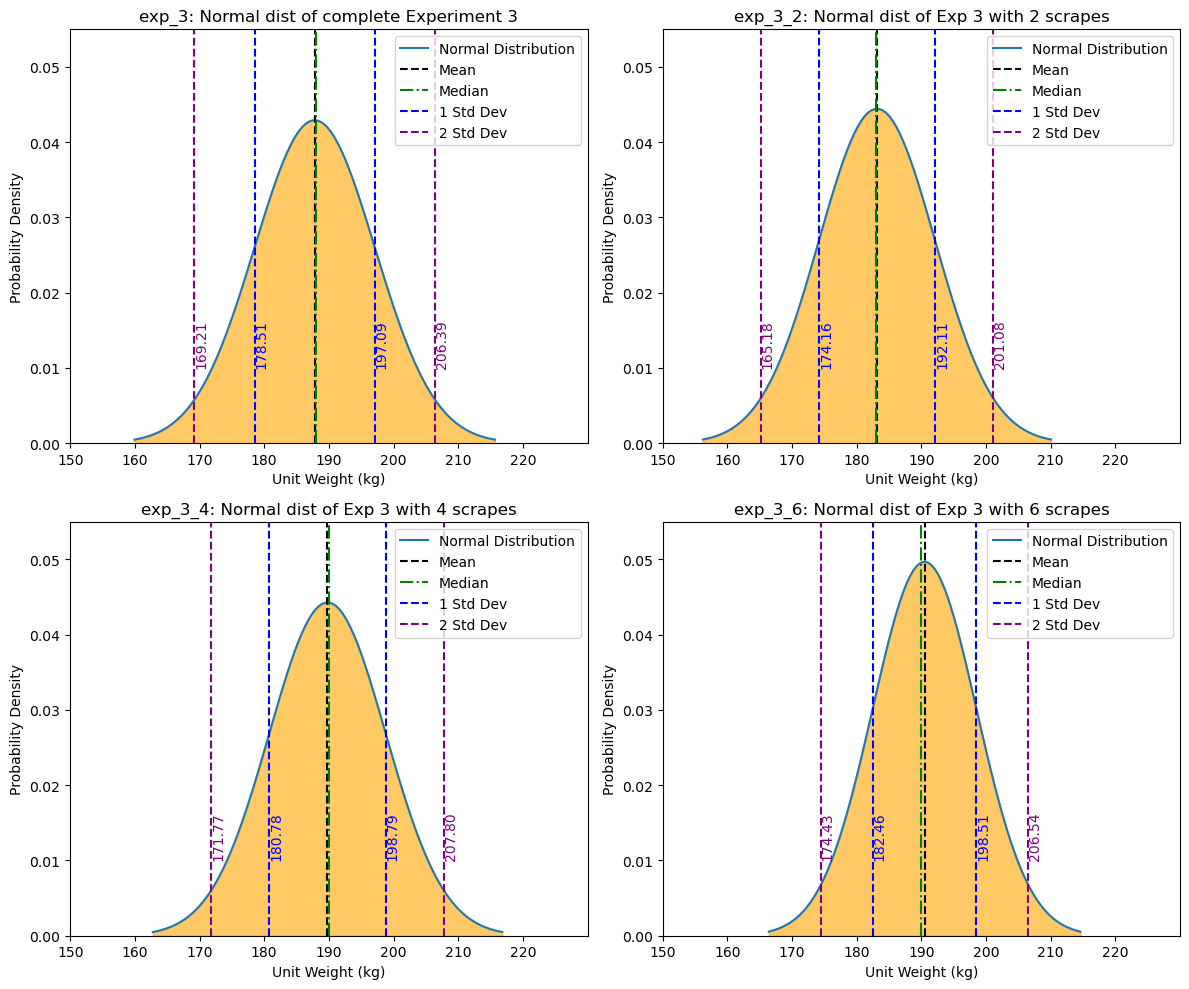

In [ ]:
#Plot normal distibution curve for exp 3, separated by number of scrapes

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plotting for exp_3
ax1 = axes[0, 0]
ax1.set_title('exp_3: Normal dist of complete Experiment 3')

mu_exp_3, std_exp_3 = stats.norm.fit(data_exp_3['cheese_weight'])
x_exp_3 = np.linspace(mu_exp_3 - 3*std_exp_3, mu_exp_3 + 3*std_exp_3, 100)
pdf_exp_3 = stats.norm.pdf(x_exp_3, mu_exp_3, std_exp_3)

ax1.plot(x_exp_3, pdf_exp_3, label='Normal Distribution')
ax1.fill_between(x_exp_3, pdf_exp_3, 0, alpha=0.6, color='orange')
ax1.axvline(np.mean(data_exp_3['cheese_weight']), color='black', linestyle='--', label='Mean')
ax1.axvline(np.median(data_exp_3['cheese_weight']), color='green', linestyle='-.', label='Median')
ax1.axvline(mu_exp_3 - std_exp_3, color='blue', linestyle='--', label='1 Std Dev')
ax1.axvline(mu_exp_3 + std_exp_3, color='blue', linestyle='--')
ax1.axvline(mu_exp_3 - 2*std_exp_3, color='purple', linestyle='--', label='2 Std Dev')
ax1.axvline(mu_exp_3 + 2*std_exp_3, color='purple', linestyle='--')

# Add text annotations for standard deviation lines
ax1.text(mu_exp_3 - std_exp_3, 0.01, f'{mu_exp_3 - std_exp_3:.2f}', color='blue', rotation=90, va='bottom')
ax1.text(mu_exp_3 + std_exp_3, 0.01, f'{mu_exp_3 + std_exp_3:.2f}', color='blue', rotation=90, va='bottom')
ax1.text(mu_exp_3 - 2*std_exp_3, 0.01, f'{mu_exp_3 - 2*std_exp_3:.2f}', color='purple', rotation=90, va='bottom')
ax1.text(mu_exp_3 + 2*std_exp_3, 0.01, f'{mu_exp_3 + 2*std_exp_3:.2f}', color='purple', rotation=90, va='bottom')

ax1.legend()
ax1.set_xlabel('Unit Weight (kg)')
ax1.set_ylabel('Probability Density')
ax1.set(xlim=(150, 230), xticks=np.arange(150,230,10))
ax1.set(ylim=(0, 0.055), yticks=np.arange(0, 0.055, 0.01))

# Plotting for Exp_3_2s
ax2 = axes[0, 1]
ax2.set_title('exp_3_2: Normal dist of Exp 3 with 2 scrapes')

mu_exp_3_2, std_exp_3_2 = stats.norm.fit(exp_3_2_scrapes['cheese_weight'])
x_exp_3_2 = np.linspace(mu_exp_3_2 - 3*std_exp_3_2, mu_exp_3_2 + 3*std_exp_3_2, 100)
pdf_exp_3_2 = stats.norm.pdf(x_exp_3_2, mu_exp_3_2, std_exp_3_2)

ax2.plot(x_exp_3_2, pdf_exp_3_2, label='Normal Distribution')
ax2.fill_between(x_exp_3_2, pdf_exp_3_2, 0, alpha=0.6, color='orange')
ax2.axvline(np.mean(exp_3_2_scrapes['cheese_weight']), color='black', linestyle='--', label='Mean')
ax2.axvline(np.median(exp_3_2_scrapes['cheese_weight']), color='green', linestyle='-.', label='Median')
ax2.axvline(mu_exp_3_2 - std_exp_3_2, color='blue', linestyle='--', label='1 Std Dev')
ax2.axvline(mu_exp_3_2 + std_exp_3_2, color='blue', linestyle='--')
ax2.axvline(mu_exp_3_2 - 2*std_exp_3_2, color='purple', linestyle='--', label='2 Std Dev')
ax2.axvline(mu_exp_3_2 + 2*std_exp_3_2, color='purple', linestyle='--')

# Add text annotations for standard deviation lines
ax2.text(mu_exp_3_2 - std_exp_3_2, 0.01, f'{mu_exp_3_2 - std_exp_3_2:.2f}', color='blue', rotation=90, va='bottom')
ax2.text(mu_exp_3_2 + std_exp_3_2, 0.01, f'{mu_exp_3_2 + std_exp_3_2:.2f}', color='blue', rotation=90, va='bottom')
ax2.text(mu_exp_3_2 - 2*std_exp_3_2, 0.01, f'{mu_exp_3_2 - 2*std_exp_3_2:.2f}', color='purple', rotation=90, va='bottom')
ax2.text(mu_exp_3_2 + 2*std_exp_3_2, 0.01, f'{mu_exp_3_2 + 2*std_exp_3_2:.2f}', color='purple', rotation=90, va='bottom')

ax2.legend()
ax2.set_xlabel('Unit Weight (kg)')
ax2.set_ylabel('Probability Density')
ax2.set(xlim=(150, 230), xticks=np.arange(150,230,10))
ax2.set(ylim=(0, 0.055), yticks=np.arange(0, 0.055, 0.01))

# Plotting for Exp_3_4s
ax3 = axes[1, 0]
ax3.set_title('exp_3_4: Normal dist of Exp 3 with 4 scrapes')

mu_exp_3_4, std_exp_3_4 = stats.norm.fit(exp_3_4_scrapes['cheese_weight'])
x_exp_3_4 = np.linspace(mu_exp_3_4 - 3*std_exp_3_4, mu_exp_3_4 + 3*std_exp_3_4, 100)
pdf_exp_3_4 = stats.norm.pdf(x_exp_3_4, mu_exp_3_4, std_exp_3_4)

ax3.plot(x_exp_3_4, pdf_exp_3_4, label='Normal Distribution')
ax3.fill_between(x_exp_3_4, pdf_exp_3_4, 0, alpha=0.6, color='orange')
ax3.axvline(np.mean(exp_3_4_scrapes['cheese_weight']), color='black', linestyle='--', label='Mean')
ax3.axvline(np.median(exp_3_4_scrapes['cheese_weight']), color='green', linestyle='-.', label='Median')
ax3.axvline(mu_exp_3_4 - std_exp_3_4, color='blue', linestyle='--', label='1 Std Dev')
ax3.axvline(mu_exp_3_4 + std_exp_3_4, color='blue', linestyle='--')
ax3.axvline(mu_exp_3_4 - 2*std_exp_3_4, color='purple', linestyle='--', label='2 Std Dev')
ax3.axvline(mu_exp_3_4 + 2*std_exp_3_4, color='purple', linestyle='--')

# Add text annotations for standard deviation lines
ax3.text(mu_exp_3_4 - std_exp_3_4, 0.01, f'{mu_exp_3_4 - std_exp_3_4:.2f}', color='blue', rotation=90, va='bottom')
ax3.text(mu_exp_3_4 + std_exp_3_4, 0.01, f'{mu_exp_3_4 + std_exp_3_4:.2f}', color='blue', rotation=90, va='bottom')
ax3.text(mu_exp_3_4 - 2*std_exp_3_4, 0.01, f'{mu_exp_3_4 - 2*std_exp_3_4:.2f}', color='purple', rotation=90, va='bottom')
ax3.text(mu_exp_3_4 + 2*std_exp_3_4, 0.01, f'{mu_exp_3_4 + 2*std_exp_3_4:.2f}', color='purple', rotation=90, va='bottom')

ax3.legend()
ax3.set_xlabel('Unit Weight (kg)')
ax3.set_ylabel('Probability Density')
ax3.set(xlim=(150, 230), xticks=np.arange(150,230,10))
ax3.set(ylim=(0, 0.055), yticks=np.arange(0, 0.055, 0.01))

# Plotting for Exp_3_6s
ax4 = axes[1, 1]
ax4.set_title('exp_3_6: Normal dist of Exp 3 with 6 scrapes')

mu_exp_3_6, std_exp_3_6 = stats.norm.fit(exp_3_6_scrapes['cheese_weight'])
x_exp_3_6 = np.linspace(mu_exp_3_6 - 3*std_exp_3_6, mu_exp_3_6 + 3*std_exp_3_6, 100)
pdf_exp_3_6 = stats.norm.pdf(x_exp_3_6, mu_exp_3_6, std_exp_3_6)

ax4.plot(x_exp_3_6, pdf_exp_3_6, label='Normal Distribution')
ax4.fill_between(x_exp_3_6, pdf_exp_3_6, 0, alpha=0.6, color='orange')
ax4.axvline(np.mean(exp_3_6_scrapes['cheese_weight']), color='black', linestyle='--', label='Mean')
ax4.axvline(np.median(exp_3_6_scrapes['cheese_weight']), color='green', linestyle='-.', label='Median')
ax4.axvline(mu_exp_3_6 - std_exp_3_6, color='blue', linestyle='--', label='1 Std Dev')
ax4.axvline(mu_exp_3_6 + std_exp_3_6, color='blue', linestyle='--')
ax4.axvline(mu_exp_3_6 - 2*std_exp_3_6, color='purple', linestyle='--', label='2 Std Dev')
ax4.axvline(mu_exp_3_6 + 2*std_exp_3_6, color='purple', linestyle='--')

# Add text annotations for standard deviation lines
ax4.text(mu_exp_3_6 - std_exp_3_6, 0.01, f'{mu_exp_3_6 - std_exp_3_6:.2f}', color='blue', rotation=90, va='bottom')
ax4.text(mu_exp_3_6 + std_exp_3_6, 0.01, f'{mu_exp_3_6 + std_exp_3_6:.2f}', color='blue', rotation=90, va='bottom')
ax4.text(mu_exp_3_6 - 2*std_exp_3_6, 0.01, f'{mu_exp_3_6 - 2*std_exp_3_6:.2f}', color='purple', rotation=90, va='bottom')
ax4.text(mu_exp_3_6 + 2*std_exp_3_6, 0.01, f'{mu_exp_3_6 + 2*std_exp_3_6:.2f}', color='purple', rotation=90, va='bottom')

ax4.legend()
ax4.set_xlabel('Unit Weight (kg)')
ax4.set_ylabel('Probability Density')
ax4.set(xlim=(150, 230), xticks=np.arange(150,230,10))
ax4.set(ylim=(0, 0.055), yticks=np.arange(0, 0.055, 0.01))

plt.tight_layout()

plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_7_normal_dist_exp_3.jpeg', dpi=350)

plt.show()

Given that all 3 stacks in exp 3 were stored under the same conditions, we can clearly see a narrower curve for the last normal curve representing the subset with 6 scrapes. However the cheeses with 6 scrapes are  also in general bigger than those of 2 and 4 scrapes which should be expected. Based on the curves above the data shows that the overall weights are bigger as number of scrapes increases, but also the weights dispersion is smaller with more scrapes. See next table for a summary of standard dev.

In [ ]:
# Calculate percentage of cheese weights within 1 and 2 standard deviations (exp_3)
within_1_std_exp_3 = np.sum((data_exp_3['cheese_weight'] >= mu_exp_3 - std_exp_3) & (data_exp_3['cheese_weight'] <= mu_exp_3 + std_exp_3)) / len(data_exp_3['cheese_weight']) * 100
within_2_std_exp_3 = np.sum((data_exp_3['cheese_weight'] >= mu_exp_3 - 2*std_exp_3) & (data_exp_3['cheese_weight'] <= mu_exp_3 + 2*std_exp_3)) / len(data_exp_3['cheese_weight']) * 100

# Calculate percentage of cheese weights within 1 and 2 standard deviations (exp_3_2 scrapes)
within_1_std_exp_3_2 = np.sum((exp_3_2_scrapes['cheese_weight'] >= mu_exp_3_2 - std_exp_3_2) & (exp_3_2_scrapes['cheese_weight'] <= mu_exp_3_2 + std_exp_3_2)) / len(exp_3_2_scrapes['cheese_weight']) * 100
within_2_std_exp_3_2 = np.sum((exp_3_2_scrapes['cheese_weight'] >= mu_exp_3_2 - 2*std_exp_3_2) & (exp_3_2_scrapes['cheese_weight'] <= mu_exp_3_2 + 2*std_exp_3_2)) / len(exp_3_2_scrapes['cheese_weight']) * 100

# Calculate percentage of cheese weights within 1 and 2 standard deviations (exp_3_4 scrapes)
within_1_std_exp_3_4 = np.sum((exp_3_4_scrapes['cheese_weight'] >= mu_exp_3_4 - std_exp_3_4) & (exp_3_4_scrapes['cheese_weight'] <= mu_exp_3_4 + std_exp_3_4)) / len(exp_3_4_scrapes['cheese_weight']) * 100
within_2_std_exp_3_4 = np.sum((exp_3_4_scrapes['cheese_weight'] >= mu_exp_3_4 - 2*std_exp_3_4) & (exp_3_4_scrapes['cheese_weight'] <= mu_exp_3_4 + 2*std_exp_3_4)) / len(exp_3_4_scrapes['cheese_weight']) * 100

# Calculate percentage of cheese weights within 1 and 2 standard deviations (exp_3_6 scrapes)
within_1_std_exp_3_6 = np.sum((exp_3_6_scrapes['cheese_weight'] >= mu_exp_3_6 - std_exp_3_6) & (exp_3_6_scrapes['cheese_weight'] <= mu_exp_3_6 + std_exp_3_6)) / len(exp_3_6_scrapes['cheese_weight']) * 100
within_2_std_exp_3_6 = np.sum((exp_3_6_scrapes['cheese_weight'] >= mu_exp_3_6 - 2*std_exp_3_6) & (exp_3_6_scrapes['cheese_weight'] <= mu_exp_3_6 + 2*std_exp_3_6)) / len(exp_3_6_scrapes['cheese_weight']) * 100

# Calculate percentages
data_table = {
    'Experiment': ['exp_3', 'exp_3_2', 'exp_3_4', 'exp_3_6'],
    '% weights within 1 SD': [within_1_std_exp_3, within_1_std_exp_3_2, within_1_std_exp_3_4, within_1_std_exp_3_6],
    '% weights within 2 SD': [within_2_std_exp_3, within_2_std_exp_3_2, within_2_std_exp_3_4, within_2_std_exp_3_6]
}

# Print dataframe
print(pd.DataFrame(data_table))


  Experiment  % weights within 1 SD  % weights within 2 SD
0      exp_3              66.285714              96.761905
1    exp_3_2              66.857143              97.142857
2    exp_3_4              62.857143              97.142857
3    exp_3_6              64.000000              97.142857


##### 4a.2. Use Histograms to Explore inner and outer by number of scrapes

Compare the weight distributions of inner and outer for random scrapes, 2, 4 and 6 scrapes to see the best uniformity between inners and outers.

<>:44: SyntaxWarning: invalid escape sequence '\P'
<>:44: SyntaxWarning: invalid escape sequence '\P'
C:\Users\giwa.iziomo\AppData\Local\Temp\ipykernel_29844\2128914244.py:44: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_8_hist_no_of_scrapes.jpeg', dpi=350)


Histograms Comparing Weight Distribution of Inners vs Outers


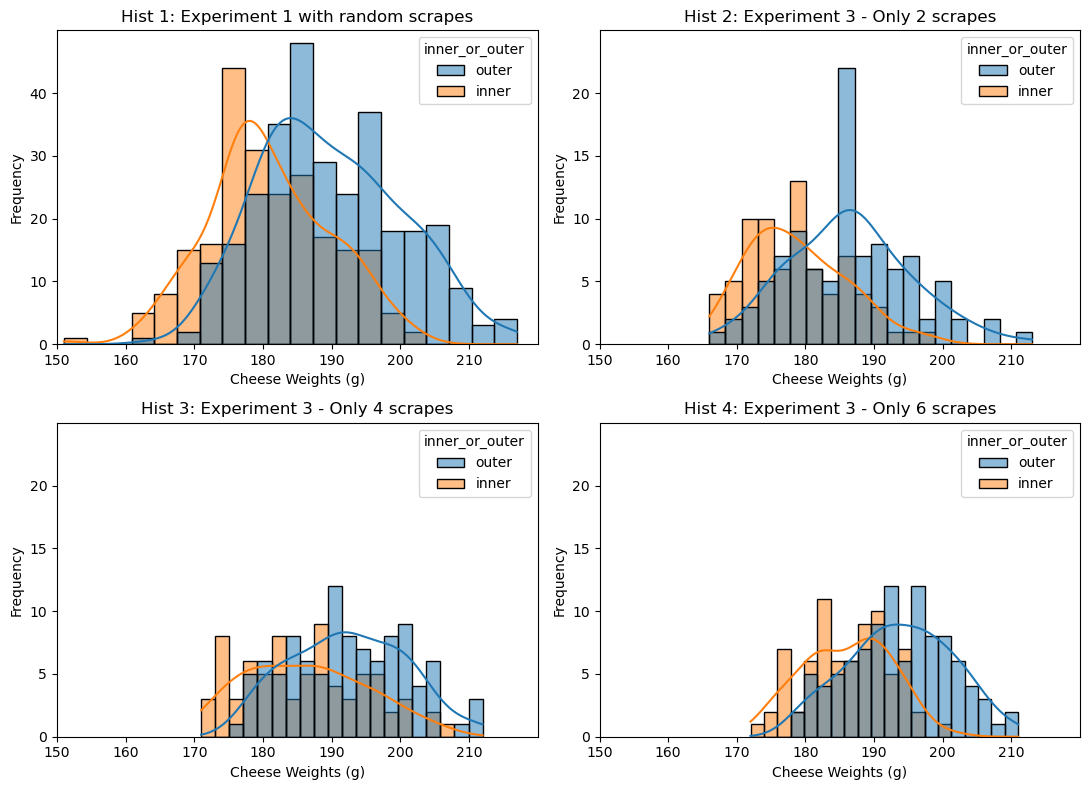

In [ ]:
# Create a 2 x 2 grid of subplots
print('Histograms Comparing Weight Distribution of Inners vs Outers')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 8))

# Plotting for exp_1
ax1 = axes[0, 0]
sns.histplot(data=data_exp_1, x='cheese_weight', bins = 20, hue='inner_or_outer', kde=True, ax=ax1)
ax1.set_xlabel('Cheese Weights (g)')
ax1.set_ylabel('Frequency')
ax1.set_title('Hist 1: Experiment 1 with random scrapes')
ax1.set(xlim=(150, 220), xticks=np.arange(150,220,10))
ax1.set(ylim=(0, 50), yticks=np.arange(0, 50, 10))

# Plotting for exp_3_2
ax2 = axes[0, 1]
sns.histplot(data=exp_3_2_scrapes, x='cheese_weight', bins = 20, hue='inner_or_outer', kde=True, ax=ax2)
ax2.set_xlabel('Cheese Weights (g)')
ax2.set_ylabel('Frequency')
ax2.set_title('Hist 2: Experiment 3 - Only 2 scrapes')
ax2.set(xlim=(150, 220), xticks=np.arange(150,220,10))
ax2.set(ylim=(0, 25), yticks=np.arange(0, 25, 5))

# Plotting for exp_3_4
ax3 = axes[1, 0]
sns.histplot(data=exp_3_4_scrapes, x='cheese_weight', bins = 20, hue='inner_or_outer', kde=True, ax=ax3)
ax3.set_xlabel('Cheese Weights (g)')
ax3.set_ylabel('Frequency')
ax3.set_title('Hist 3: Experiment 3 - Only 4 scrapes')
ax3.set(xlim=(150, 220), xticks=np.arange(150,220,10))
ax3.set(ylim=(0, 25), yticks=np.arange(0, 25, 5))

# Plotting for exp_3_6
ax4 = axes[1, 1]
sns.histplot(data=exp_3_6_scrapes, x='cheese_weight', bins = 20, hue='inner_or_outer', kde=True, ax=ax4)
ax4.set_xlabel('Cheese Weights (g)')
ax4.set_ylabel('Frequency')
ax4.set_title('Hist 4: Experiment 3 - Only 6 scrapes')
ax4.set(xlim=(150, 220), xticks=np.arange(150,220,10))
ax4.set(ylim=(0, 25), yticks=np.arange(0, 25, 5))

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_8_hist_no_of_scrapes.jpeg', dpi=350)

# Show the plot
plt.show()

Hist 2, 3 and 4 above are plotted using experiment 3 data on the same axes dimensions to visually compare weights of inners and outers. Hist 1 takes a different dimension on the y-axis compared to the others since it contains the complete 525 records in experiment 1 and therefore has much higher frequencies. Hist 2, 3 and 4 contains 175 records of weights each (from experiment 3 total 525 records). Based on the distributions, Hist 3: only 4 scrapes has the best weight overlap between inners and outers, which could indicate that there was less deviation within each tray, however in terms of weight dispersion for entire weights per subset, 6 scrapes seems to have a narrower distribution within all inners and all outers across the group, as well as a more normal distribution. Note that tray 15 (last tray of experiment 3 - 6 scrapes) was obtained from a different vat to make up the final tray since only 14 full trays were obtained from the that experiment vat. This may cause some noise in the data and would be investigated.

#### 4b. Explanation of Tray Positions and Tray Numbers from the Experiments

Below arrangement of tray numbers and tray positions were established in the experiments. Tray number is the sequence cheese trays are produced from the AFE machine while tray position is the level a tray seats on the stack when stored for acidification overnight (from 1 - 10).

##### Method of Stacking

The stacking and tray organisation for overnight acidification was performed as described in the diagram below.

##### Fig 1. Tray arrangement process for experiments 1 & 2
Rearrangement of trays was done at step 3 - after the first turn.

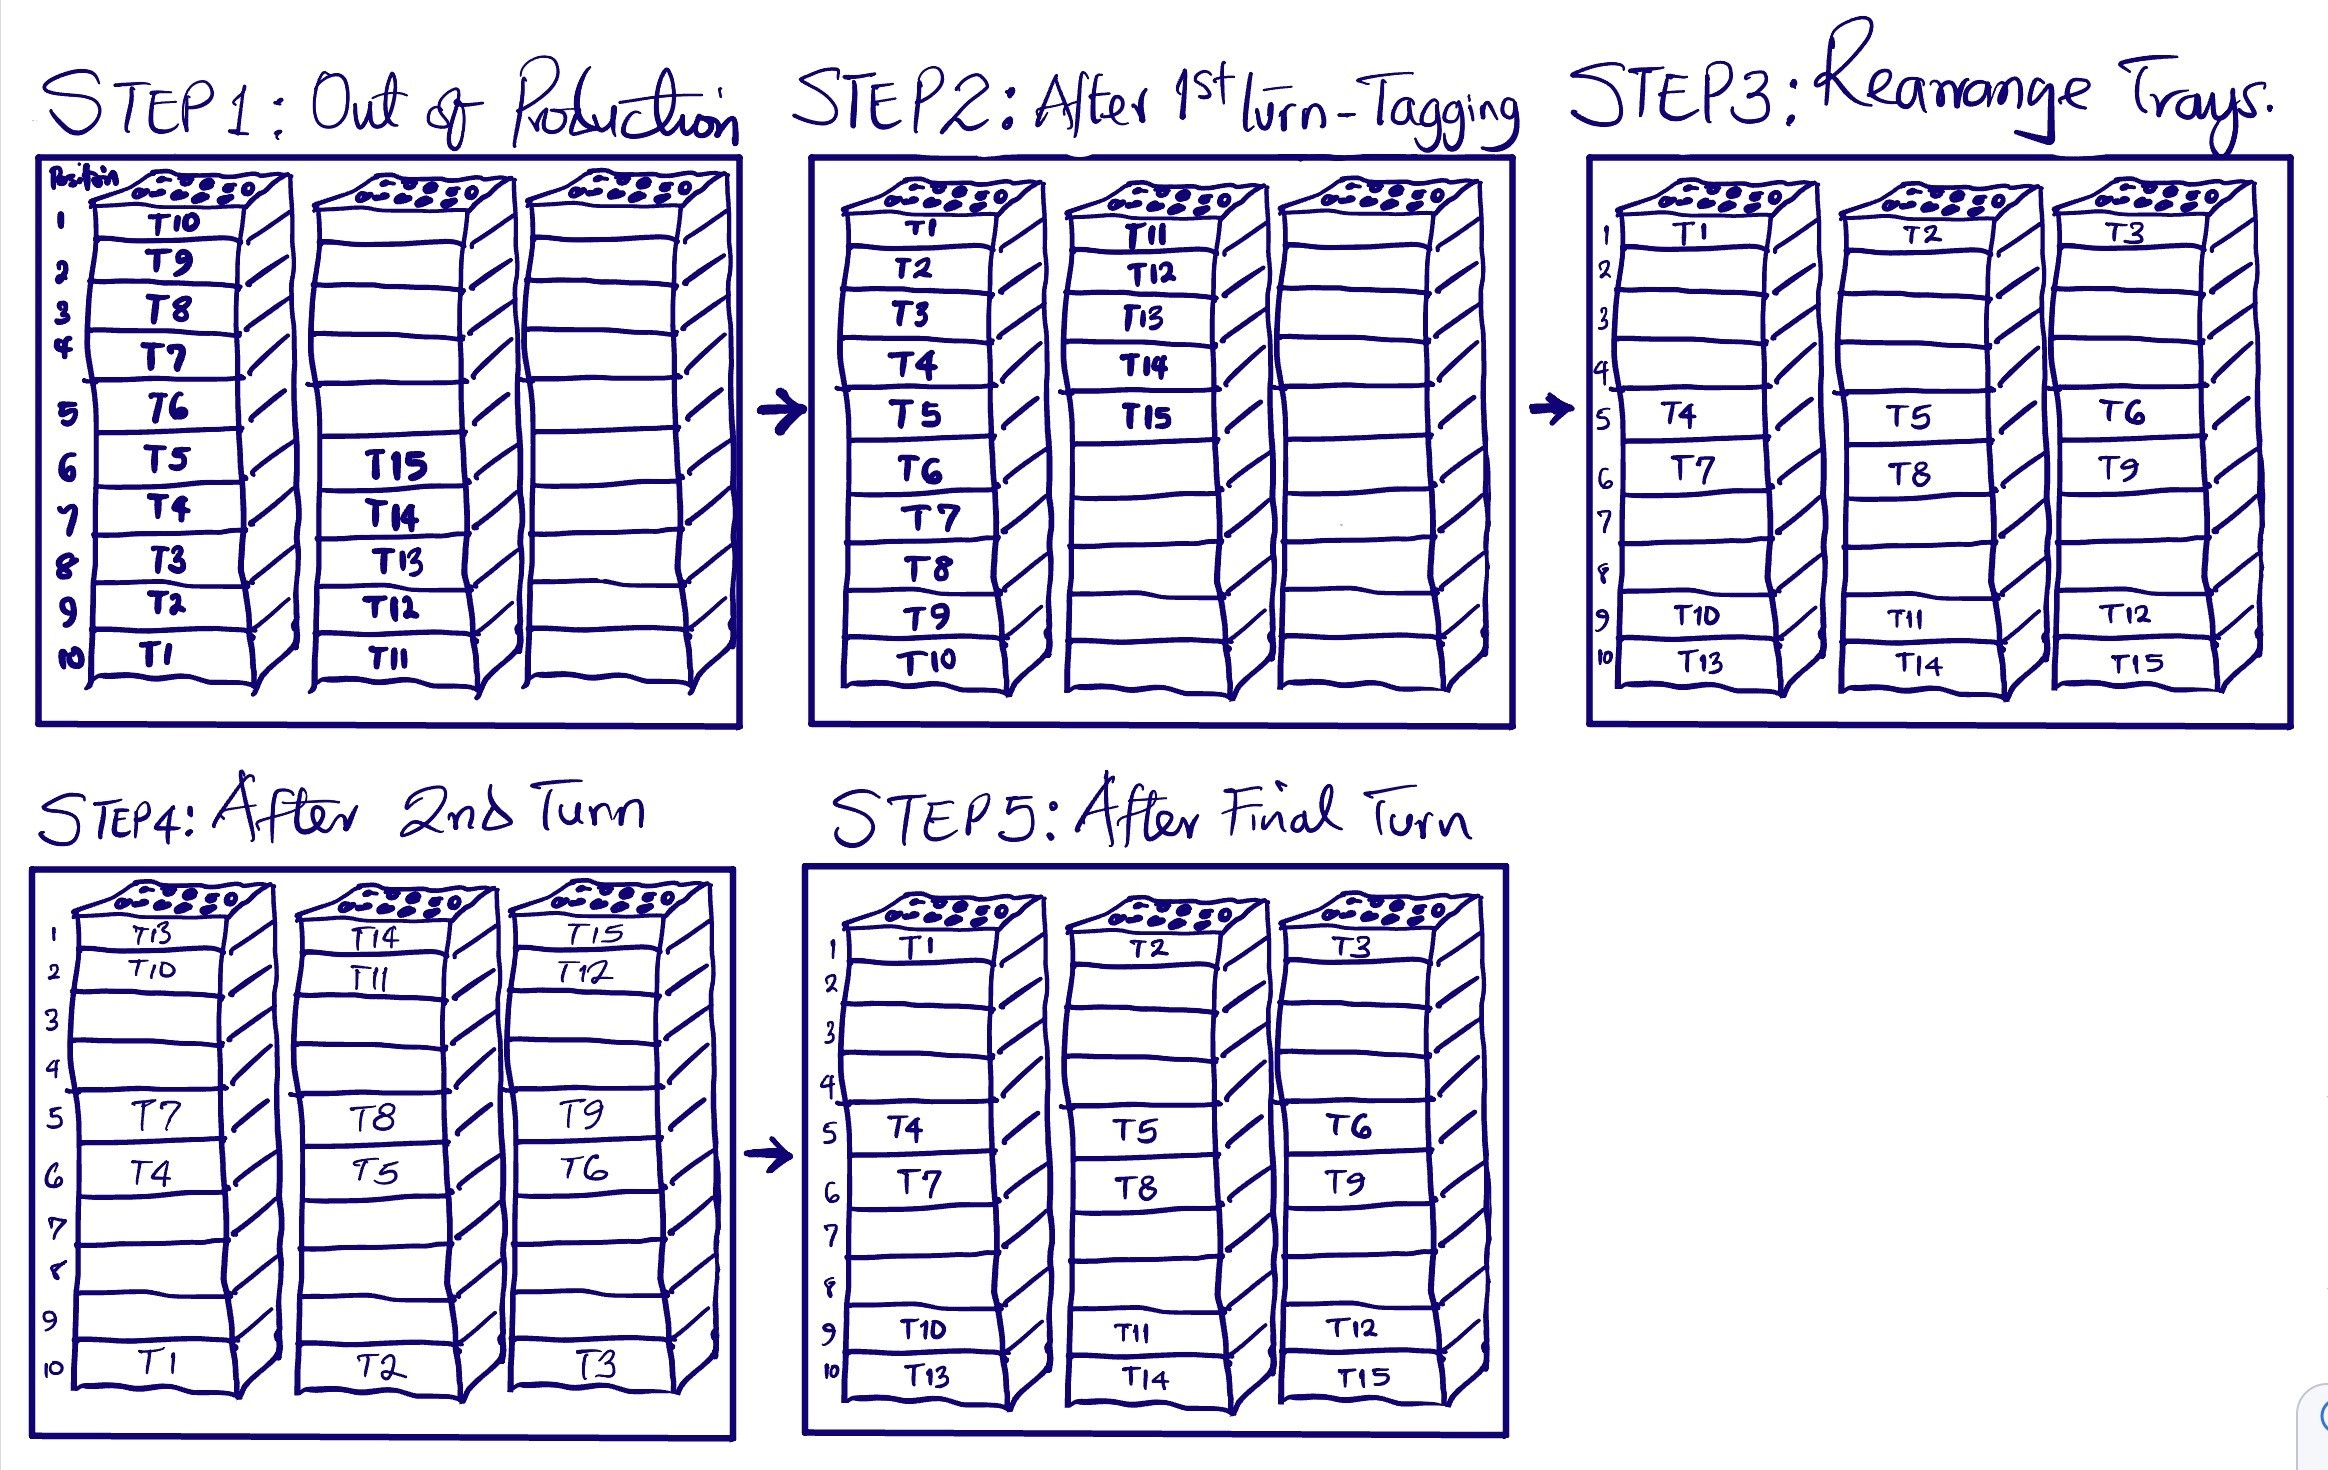

In [ ]:
from IPython.display import Image, display

# Load and display image
display(Image(filename='Fig_1_process_exp_1_2.jpg', width=1000))

##### Fig 1a. Experiment 1 & 2 Final Tray Arrangement:
Final arrangement of trays for experiments 1 and 2 is as shown below. The trays were stacked in this position for acidification overnight.

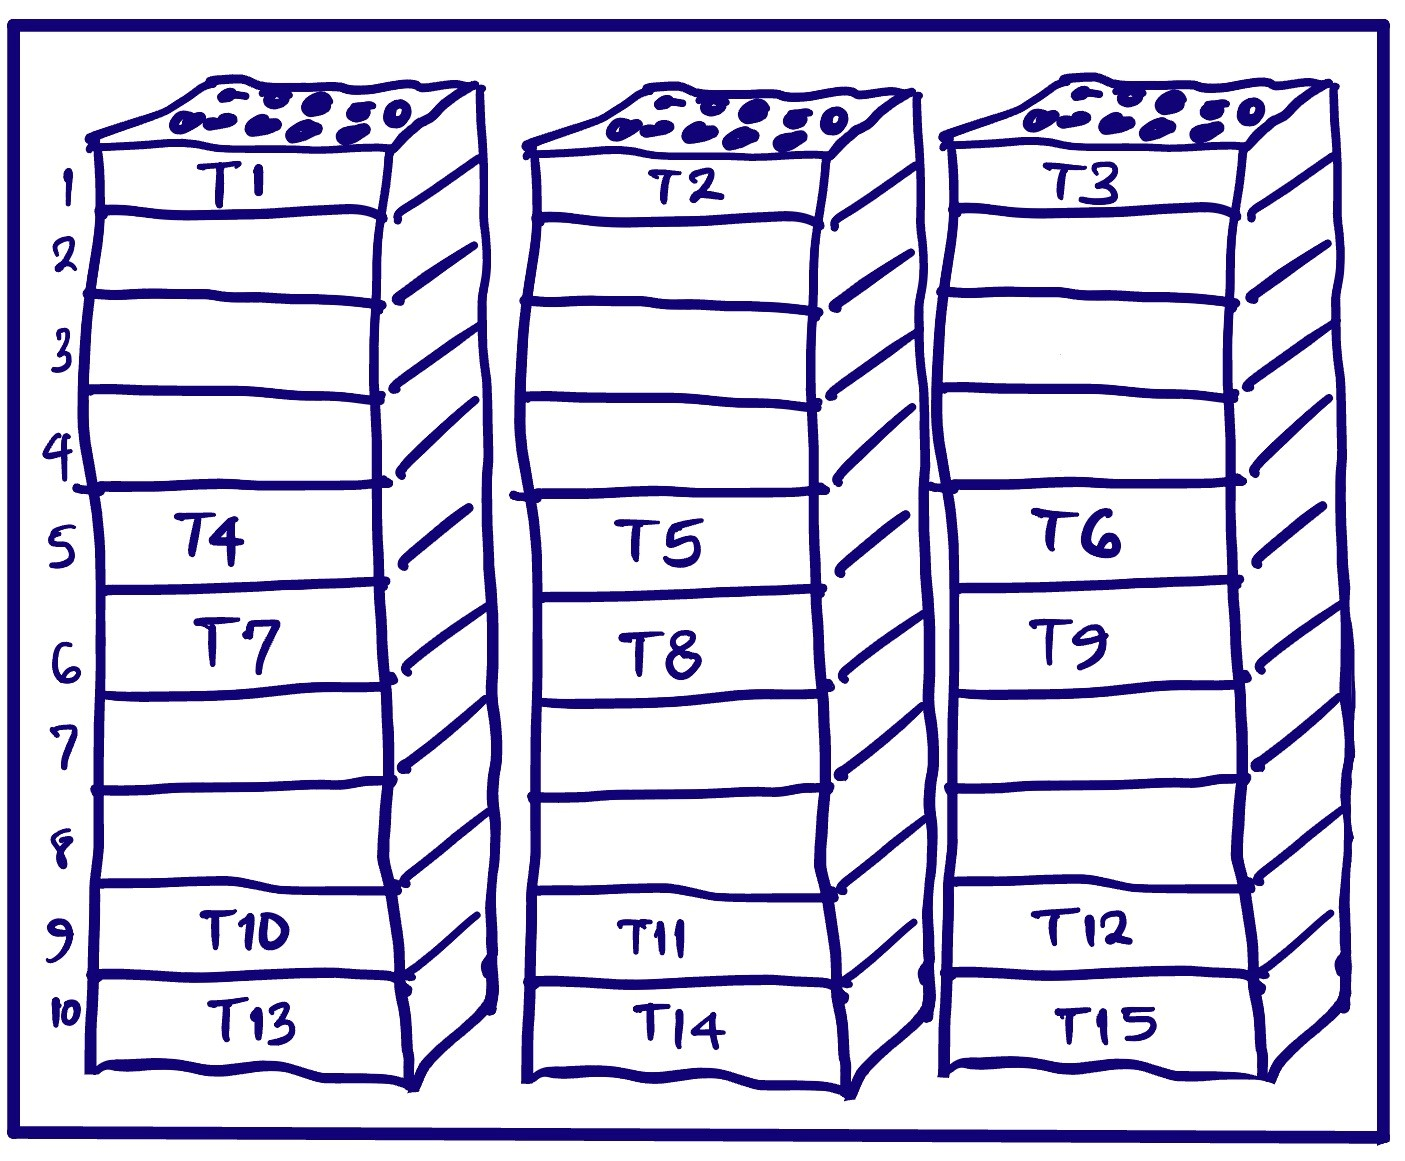

In [ ]:
display(Image(filename='Fig_1a_tray_stacks_exp_1_2.jpg', width=400))

##### Fig 2. Tray arrangement process for experiments 3
Rearangement was done after 2nd turn as against Fig 1 when rearrangement was done after 1st turn.

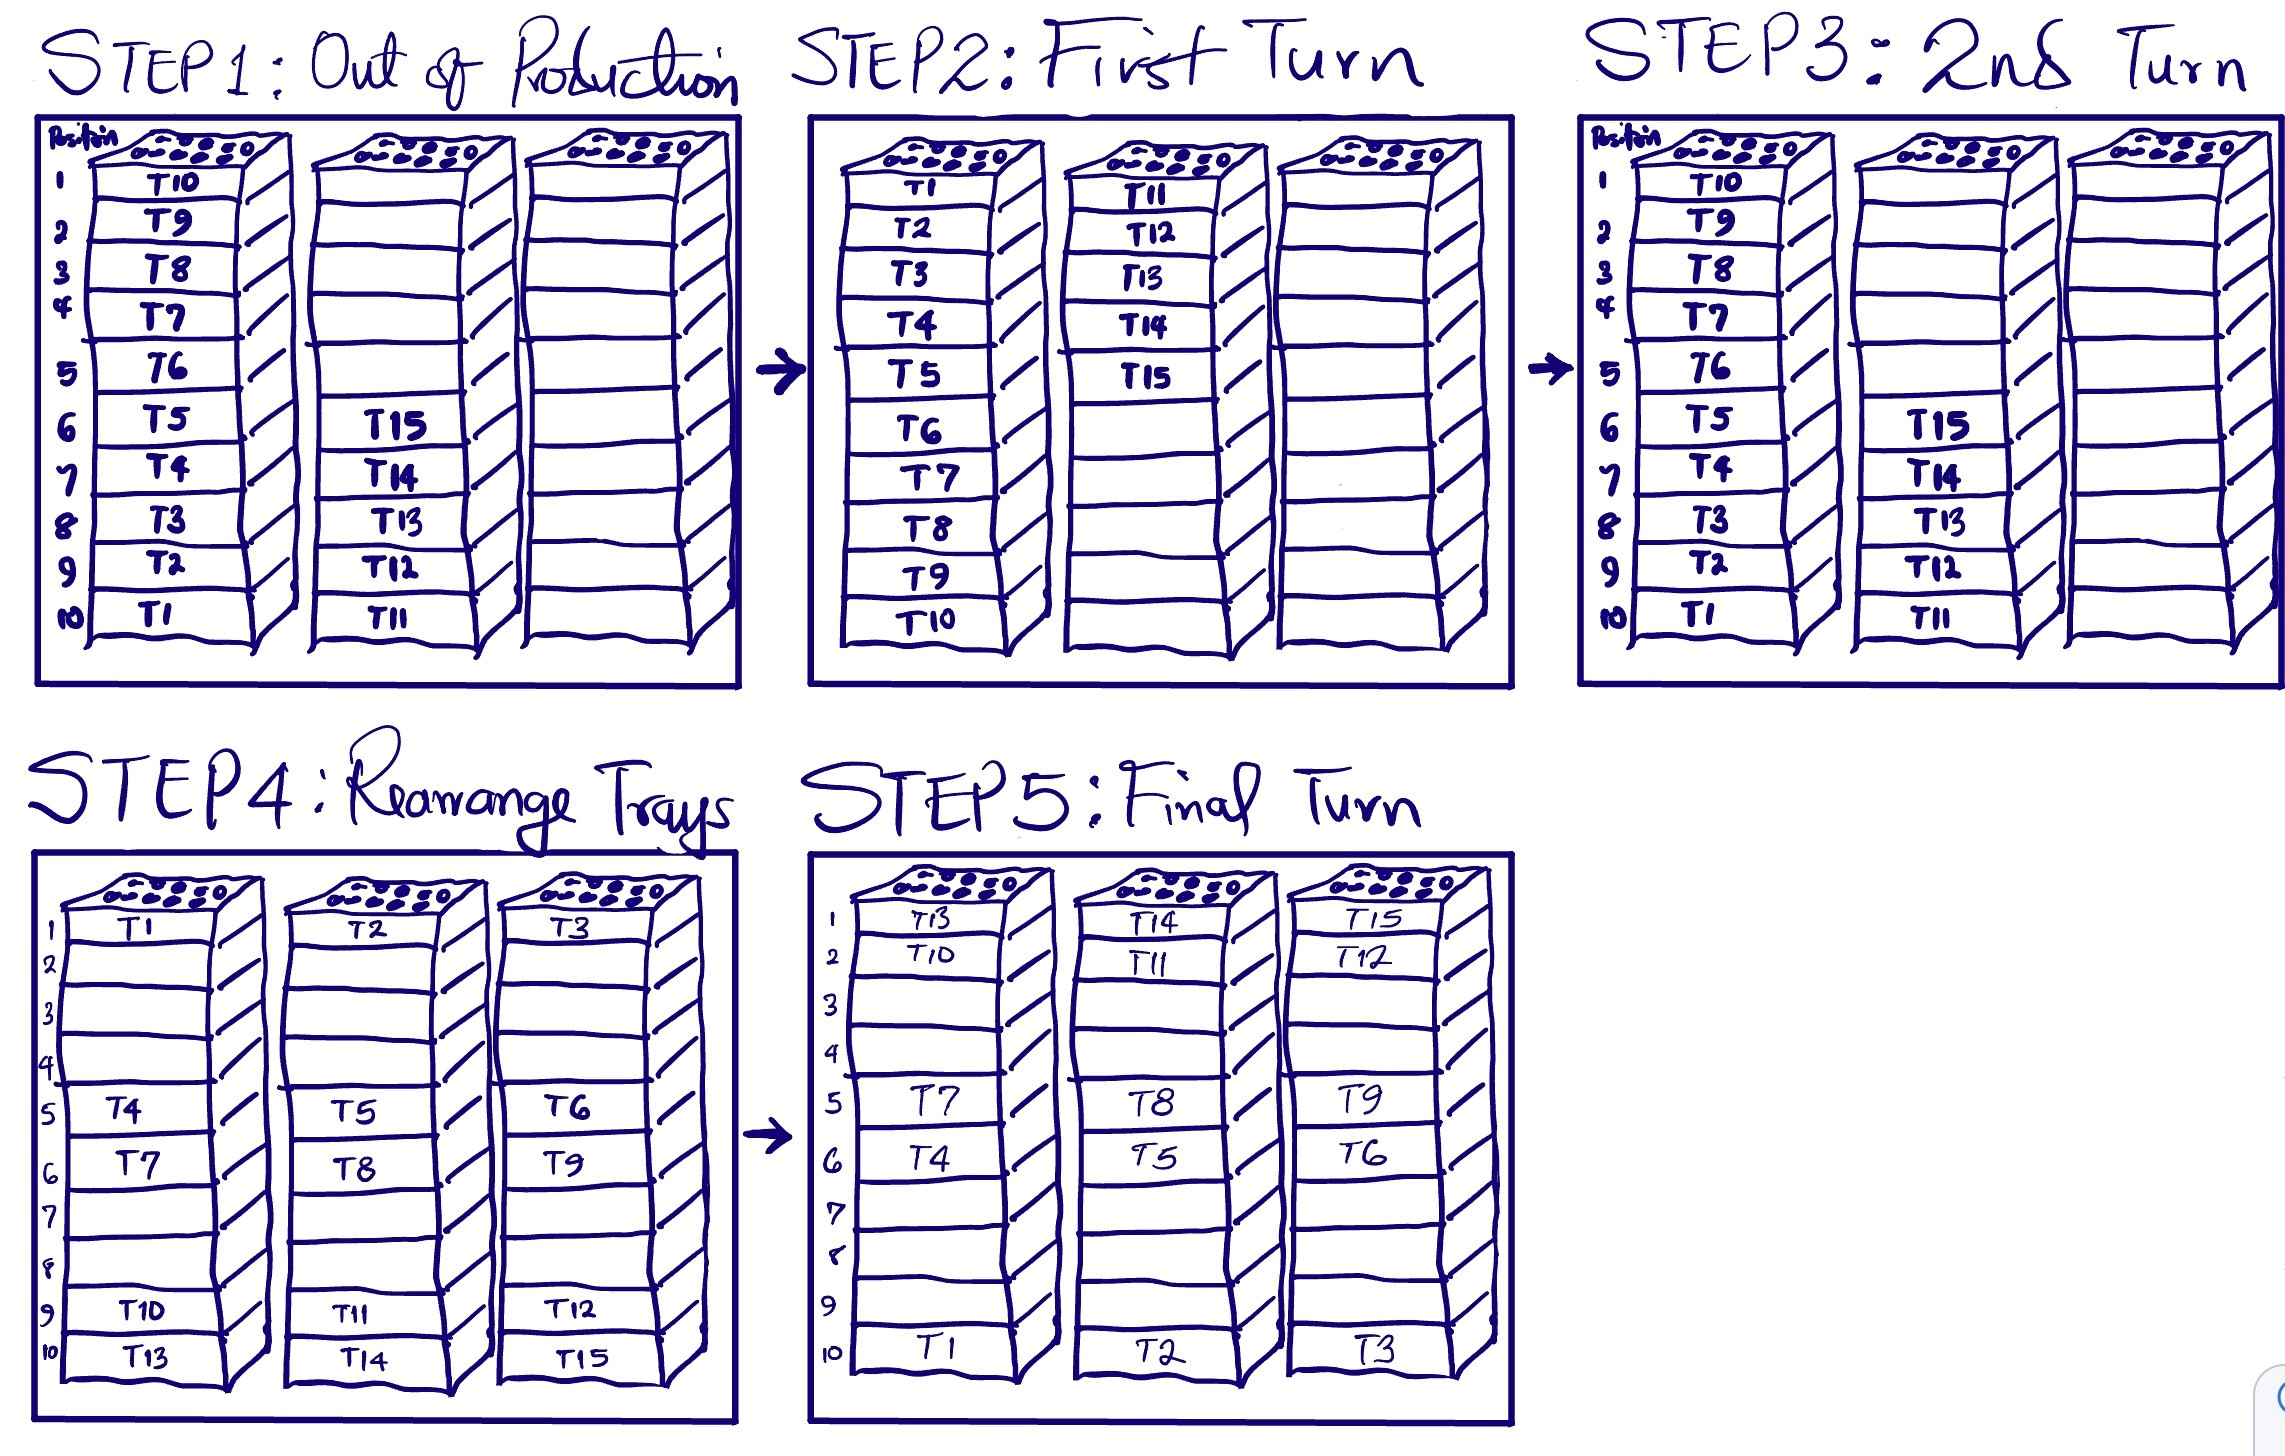

In [ ]:
display(Image(filename='Fig_2_process_exp_3.jpg', width=1000))

##### Fig 2a. Experiment 3 Tray Arrangement:
Final arrangement of trays for experiment 3 is as shown below. The trays were stacked in this position for acidification overnight.

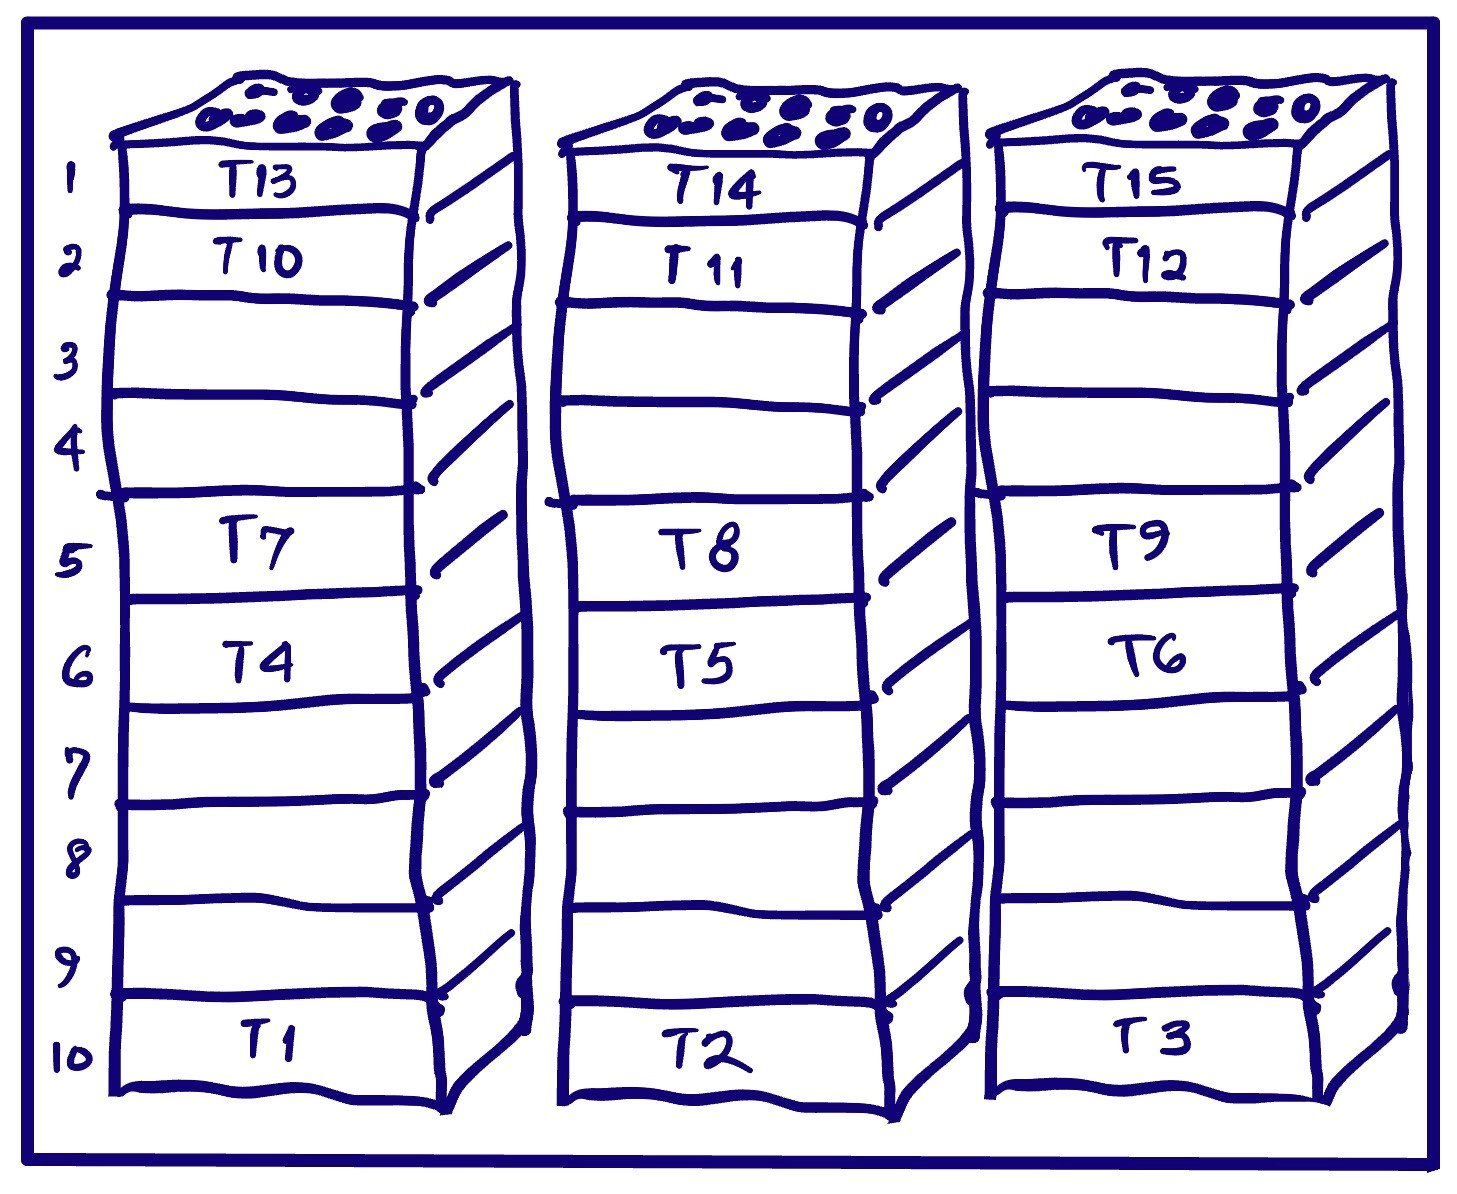

In [ ]:
display(Image(filename='Fig_2a_tray_stacks_exp_3.jpg', width=400))

#### 4c. Investigate the Impact of Tray Positions and Tray Numbers on Cheese Weight Variations

Based on the explanation provided for tray numbers and tray position above, the goal of this section is to use descriptive analytics to get a sense of how cheese weight variations are associated with tray position in stacks and tray numbers.

##### Weights vs Tray Positions:
The trays (each containing 35 cheese moulds) were arranged into 3 stacks with each tray positioned as shown in section 4b. Each column is a stack of 10 trays (based on actual day to day practice), and our tracked trays are located in position 1 (top), 5 & 6 (middle) and 9 & 10 (bottom). By plotting the cheese weights vs tray position in the stacks we can see how tray positions are associated with the final cheese weights after overnight acidification.

##### Weights vs Tray Numbers

Refering to the same diagrams above, for each experiment (exp 1, 2 and 3) 15 trays were obtained from only one vat of cheese monitored per experiment (expect exp 3 which only had 14 trays). The trays were labelled 1 - 15 in sequence as they come out of the AFE production machine. The trays were arranged in the order shown in section 4b Fig 1a (exp 1 & 2) and 2a (exp 3), and tracked using their tray numbers. By plotting the cheese weights vs tray number, we may be able to identify if the weights vary depending on the order in which they come out of the AFE machine.

In [ ]:
# Print unique tray positions and unique tray numbers

print('Unique Tray Positions: ', data['tray_position'].unique().tolist())
print('Unique Tray Numbers: ', data['tray_no'].unique().tolist())

Unique Tray Positions:  [1, 5, 6, 9, 10, 2]
Unique Tray Numbers:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


##### 4c.1. Cheese Weights vs Tray Position and Tray Numbers

Experiment 1 with random scrapes:


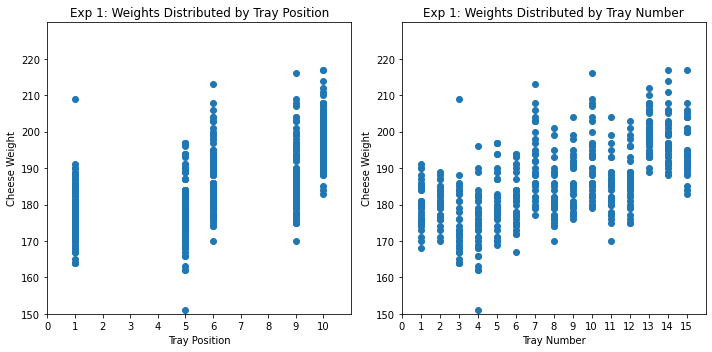

In [ ]:
# scatter plot for experiment 1 cheese_weights

print('Experiment 1 with random scrapes:')

# Create a figure and axes for the grid of plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Scatter plot 1
axes[0].scatter(data_exp_1['tray_position'], data_exp_1['cheese_weight'])
axes[0].set_title('Exp 1: Weights Distributed by Tray Position')
axes[0].set_xlabel('Tray Position')
axes[0].set_ylabel('Cheese Weight')
axes[0].set(xlim=(0, 11), xticks=np.arange(0,11,1))
axes[0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 2
axes[1].scatter(data_exp_1['tray_no'], data_exp_1['cheese_weight'])
axes[1].set_title('Exp 1: Weights Distributed by Tray Number')
axes[1].set_xlabel('Tray Number')
axes[1].set_ylabel('Cheese Weight')
axes[1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_9_scatter_exp_1.jpeg', dpi=350)

plt.show()


Weights tend to be higher down the stack and according to the sequence of tray number.

Experiment 2 with ALPMA Method of 2 scrapes:


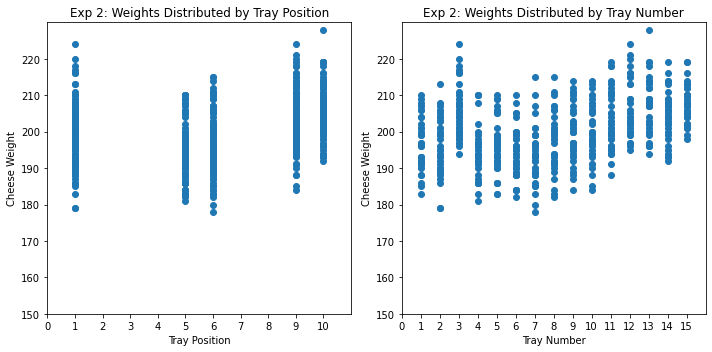

In [ ]:
# scatter plot for experiment 2 cheese_weights

print('Experiment 2 with ALPMA Method of 2 scrapes:')

# Create a figure and axes for the grid of plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Scatter plot 1
axes[0].scatter(data_exp_2['tray_position'], data_exp_2['cheese_weight'])
axes[0].set_title('Exp 2: Weights Distributed by Tray Position')
axes[0].set_xlabel('Tray Position')
axes[0].set_ylabel('Cheese Weight')
axes[0].set(xlim=(0, 11), xticks=np.arange(0,11,1))
axes[0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 2
axes[1].scatter(data_exp_2['tray_no'], data_exp_2['cheese_weight'])
axes[1].set_title('Exp 2: Weights Distributed by Tray Number')
axes[1].set_xlabel('Tray Number')
axes[1].set_ylabel('Cheese Weight')
axes[1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))


# Adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_10_scatter_exp_2.jpeg', dpi=350)

plt.show()


Same pattern observed in exp 1 except that the weights seem to be less dispersed compared to exp 1 and fewer outliers are noticed.

However, the weights here tend to be generally bigger which could be a factor of curd texture on the day of experiment 2 as indicative from the AFE height setting of 108mm for exp 2 compared to exp 1 at 113mm. Basically, the higher the curd texture the lower the AFE height, to reduce the amount of curds going into the moulds. Curd texture is determined by factors that occur during the cheese making process which is before the AFE production stage. The AFE height is the operator's way of balancing the effects of the cheesemaking process on cheese weights, by checking the curd texture and other considerations to set a specific height on the AFE (usning tacit knowledge).

For experiment 3 the plots will be divided into 3 based on number of scrapes (2, 4 and 6) in order to capture the effects of scrapes.

Experiment 3 with 2 scrapes - all 5 trays, inners and outers together:


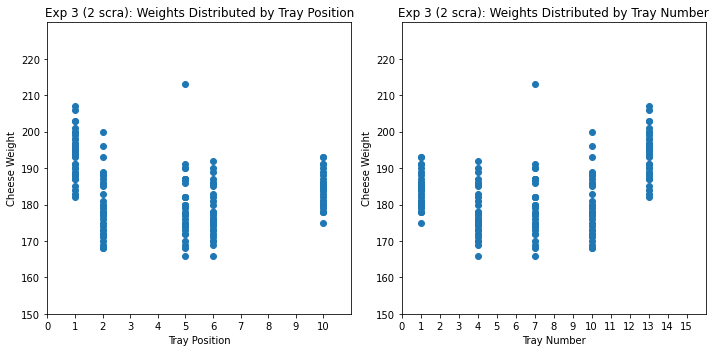

In [ ]:
# scatter plot for experiment 3 cheese_weights (2 scrapes)

print('Experiment 3 with 2 scrapes - all 5 trays, inners and outers together:')

# Create a figure and axes for the grid of plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Scatter plot 1
axes[0].scatter(exp_3_2_scrapes['tray_position'], exp_3_2_scrapes['cheese_weight'])
axes[0].set_title('Exp 3 (2 scra): Weights Distributed by Tray Position')
axes[0].set_xlabel('Tray Position')
axes[0].set_ylabel('Cheese Weight')
axes[0].set(xlim=(0, 11), xticks=np.arange(0,11,1))
axes[0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 2
axes[1].scatter(exp_3_2_scrapes['tray_no'], exp_3_2_scrapes['cheese_weight'])
axes[1].set_title('Exp 3 (2 scra): Weights Distributed by Tray Number')
axes[1].set_xlabel('Tray Number')
axes[1].set_ylabel('Cheese Weight')
axes[1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_11_scatter_exp_3_2scrapes.jpeg', dpi=350)

plt.show()


Recall that in exp 3, trays were arranged different from exp 1 & 2 in such a way that 13, 14 and 15 were on top and 1, 2 and 3 were at the bottom. Unlike exp 1 and 2, for weights vs tray position here the weights seem to decrease as we go from top to bottom in the stacked column. While for weight vs tray number the trend remains the same with exp 1 & 2, increasing with sequence of tray number.

Experiment 3 with 4 scrapes - all 5 trays, no differentiation between inners / outers:


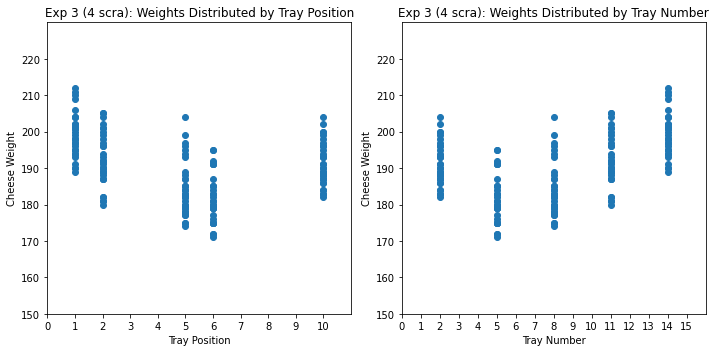

In [ ]:
# scatter plot for experiment 3 cheese_weights (4 scrapes)

print('Experiment 3 with 4 scrapes - all 5 trays, no differentiation between inners / outers:')

# Create a figure and axes for the grid of plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Scatter plot 1
axes[0].scatter(exp_3_4_scrapes['tray_position'], exp_3_4_scrapes['cheese_weight'])
axes[0].set_title('Exp 3 (4 scra): Weights Distributed by Tray Position')
axes[0].set_xlabel('Tray Position')
axes[0].set_ylabel('Cheese Weight')
axes[0].set(xlim=(0, 11), xticks=np.arange(0,11,1))
axes[0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 2
axes[1].scatter(exp_3_4_scrapes['tray_no'], exp_3_4_scrapes['cheese_weight'])
axes[1].set_title('Exp 3 (4 scra): Weights Distributed by Tray Number')
axes[1].set_xlabel('Tray Number')
axes[1].set_ylabel('Cheese Weight')
axes[1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_12_scatter_exp_3_4scrapes.jpeg', dpi=350)

plt.show()

Similar trend observed as exp 3 with 2 scrapes. However, the weights seem to be slighty less dispersed.

Experiment 3 with 6 scrapes - all 5 trays, no differentiation between inners / outers:


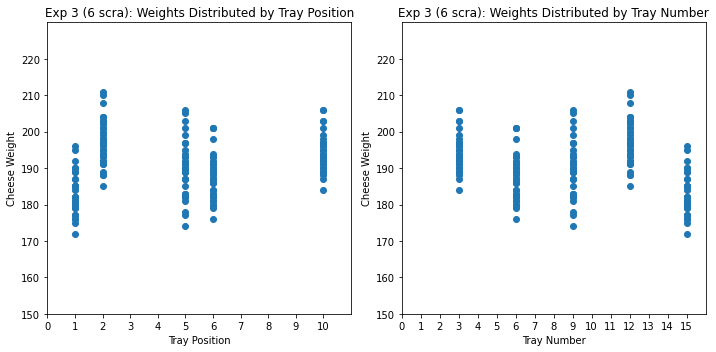

In [ ]:
# scatter plot for experiment 3 cheese_weights (6 scrapes)
print('Experiment 3 with 6 scrapes - all 5 trays, no differentiation between inners / outers:')

# Create a figure and axes for the grid of plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Scatter plot 1
axes[0].scatter(exp_3_6_scrapes['tray_position'], exp_3_6_scrapes['cheese_weight'])
axes[0].set_title('Exp 3 (6 scra): Weights Distributed by Tray Position')
axes[0].set_xlabel('Tray Position')
axes[0].set_ylabel('Cheese Weight')
axes[0].set(xlim=(0, 11), xticks=np.arange(0,11,1))
axes[0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 2
axes[1].scatter(exp_3_6_scrapes['tray_no'], exp_3_6_scrapes['cheese_weight'])
axes[1].set_title('Exp 3 (6 scra): Weights Distributed by Tray Number')
axes[1].set_xlabel('Tray Number')
axes[1].set_ylabel('Cheese Weight')
axes[1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_13_scatter_exp_3_6scrapes.jpeg', dpi=350)

plt.show()

The trend is consistent except for Tray 15 having lower weights than to the rest. Note that for exp 3, the last tray (Tray 15) was the first tray from the next vat (i.e. different vat from the other 14). The tray was used to complete the experiment trays to 15 pcs.

##### 4c.2. Cheese Weights vs Tray Position and Tray Numbers: separated by inners and outers

Removing the noise caused by inners and outers would allow us to see if the pattern is consistent across inner and outer categories

In [ ]:
# Separate exp 1, 2 and 3 into DataFrames of inners and outers each

# Experiment 1:
exp_1_inners = data_exp_1[data_exp_1['inner_or_outer'] == 'inner']
exp_1_outers = data_exp_1[data_exp_1['inner_or_outer'] == 'outer']

# Experiment 2:
exp_2_inners = data_exp_2[data_exp_2['inner_or_outer'] == 'inner']
exp_2_outers = data_exp_2[data_exp_2['inner_or_outer'] == 'outer']

# Experiment 3 - 2 scrapes:
exp_3_2scrapes_inners = data_exp_3[np.logical_and(data_exp_3['inner_or_outer'] == 'inner', data_exp_3['no_of_scrapes'] == '2')]
exp_3_2scrapes_outers = data_exp_3[np.logical_and(data_exp_3['inner_or_outer'] == 'outer', data_exp_3['no_of_scrapes'] == '2')]

# Experiment 3 - 4 scrapes:
exp_3_4scrapes_inners = data_exp_3[np.logical_and(data_exp_3['inner_or_outer'] == 'inner', data_exp_3['no_of_scrapes'] == '4')]
exp_3_4scrapes_outers = data_exp_3[np.logical_and(data_exp_3['inner_or_outer'] == 'outer', data_exp_3['no_of_scrapes'] == '4')]

# Experiment 3 - 6 scrapes:
exp_3_6scrapes_inners = data_exp_3[np.logical_and(data_exp_3['inner_or_outer'] == 'inner', data_exp_3['no_of_scrapes'] == '6')]
exp_3_6scrapes_outers = data_exp_3[np.logical_and(data_exp_3['inner_or_outer'] == 'outer', data_exp_3['no_of_scrapes'] == '6')]

exp_3_6scrapes_outers.head(2)

prod_date  runnumber  vat_no  cheese_type  afe_height  tray_no  \
serial_no                                                                    
1121       19/04/2023     310941       2  Button Mill         110        3   
1122       19/04/2023     310941       2  Button Mill         110        3   

          inner_or_outer  cheese_weight  tray_position tray_class  stack_no  \
serial_no                                                                     
1121               outer            206             10     bottom         3   
1122               outer            198             10     bottom         3   

          stack_position no_of_scrapes vat_position exp_num  
serial_no                                                    
1121           inbetween             6            2   exp_3  
1122           inbetween             6            2   exp_3

Experiment 1 - grouped into inners and outers:


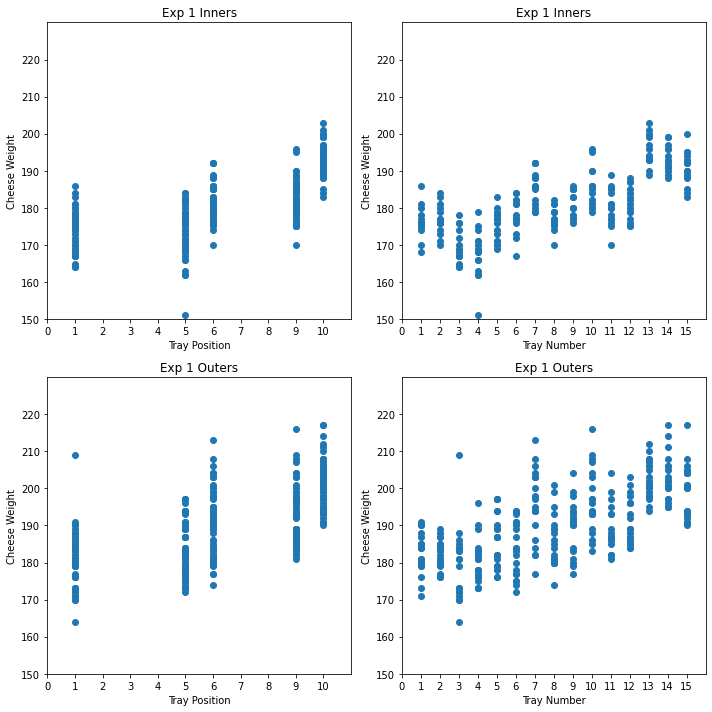

In [ ]:
# Scatter plot of tray_position and tray_no for inners and outers separately (exp_1 only).
print('Experiment 1 - grouped into inners and outers:')

# Create a figure and axes for the grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Scatter plot 1: Experiment 1 Inners - tray_position vs. cheese_weight
axes[0, 0].scatter(exp_1_inners['tray_position'], exp_1_inners['cheese_weight'])
axes[0, 0].set_title('Exp 1 Inners')
axes[0, 0].set_xlabel('Tray Position')
axes[0, 0].set_ylabel('Cheese Weight')
axes[0, 0].set(xlim=(0, 11), xticks=np.arange(0,11,1))
axes[0, 0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 2: Experiment 1 Inners - tray_no vs. cheese_weight
axes[0, 1].scatter(exp_1_inners['tray_no'], exp_1_inners['cheese_weight'])
axes[0, 1].set_title('Exp 1 Inners')
axes[0, 1].set_xlabel('Tray Number')
axes[0, 1].set_ylabel('Cheese Weight')
axes[0, 1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[0, 1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 3: Experiment 1 Outers - tray_position vs. cheese_weight
axes[1, 0].scatter(exp_1_outers['tray_position'], exp_1_outers['cheese_weight'])
axes[1, 0].set_title('Exp 1 Outers')
axes[1, 0].set_xlabel('Tray Position')
axes[1, 0].set_ylabel('Cheese Weight')
axes[1, 0].set(xlim=(0, 11), xticks=np.arange(0,11,1))
axes[1, 0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 4: Experiment 1 Outers - tray_no vs. cheese_weight
axes[1, 1].scatter(exp_1_outers['tray_no'], exp_1_outers['cheese_weight'])
axes[1, 1].set_title('Exp 1 Outers')
axes[1, 1].set_xlabel('Tray Number')
axes[1, 1].set_ylabel('Cheese Weight')
axes[1, 1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[1, 1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_14_scatter_exp_1_inner_outer.jpeg', dpi=350)

plt.show()

As expected the inners are less dispersed in weights.

Experiment 2 - grouped into inners and outers:


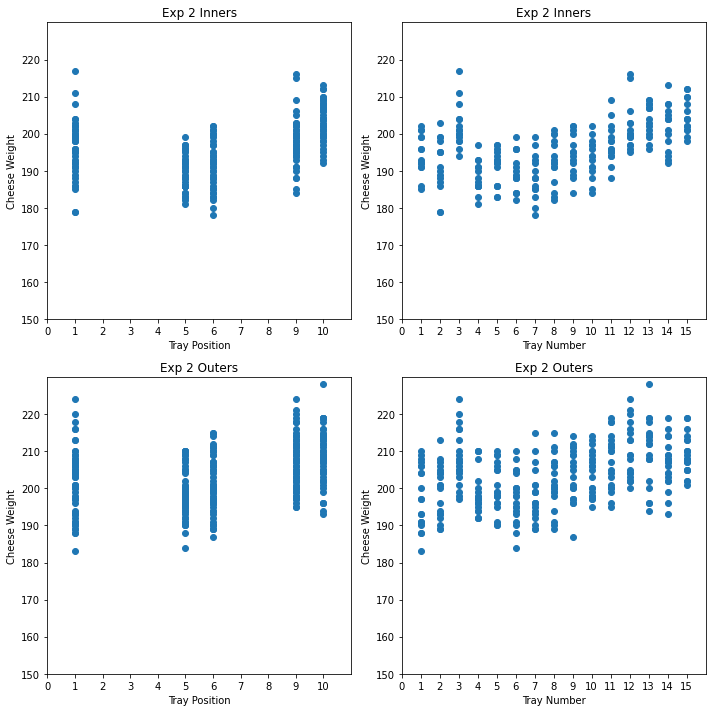

In [ ]:
# Scatter plot of tray_position and tray_no for inners and outers separately (exp_2 only).
print('Experiment 2 - grouped into inners and outers:')

# Create a figure and axes for the grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Scatter plot 1: Experiment 2 Inners - tray_position vs. cheese_weight
axes[0, 0].scatter(exp_2_inners['tray_position'], exp_2_inners['cheese_weight'])
axes[0, 0].set_title('Exp 2 Inners')
axes[0, 0].set_xlabel('Tray Position')
axes[0, 0].set_ylabel('Cheese Weight')
axes[0, 0].set(xlim=(0, 11), xticks=np.arange(0,11,1))
axes[0, 0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 2: Experiment 2 Inners - tray_no vs. cheese_weight
axes[0, 1].scatter(exp_2_inners['tray_no'], exp_2_inners['cheese_weight'])
axes[0, 1].set_title('Exp 2 Inners')
axes[0, 1].set_xlabel('Tray Number')
axes[0, 1].set_ylabel('Cheese Weight')
axes[0, 1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[0, 1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 3: Experiment 2 Outers - tray_position vs. cheese_weight
axes[1, 0].scatter(exp_2_outers['tray_position'], exp_2_outers['cheese_weight'])
axes[1, 0].set_title('Exp 2 Outers')
axes[1, 0].set_xlabel('Tray Position')
axes[1, 0].set_ylabel('Cheese Weight')
axes[1, 0].set(xlim=(0, 11), xticks=np.arange(0,11,1))
axes[1, 0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 4: Experiment 2 Outers - tray_no vs. cheese_weight
axes[1, 1].scatter(exp_2_outers['tray_no'], exp_2_outers['cheese_weight'])
axes[1, 1].set_title('Exp 2 Outers')
axes[1, 1].set_xlabel('Tray Number')
axes[1, 1].set_ylabel('Cheese Weight')
axes[1, 1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[1, 1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_15_scatter_exp_2_inner_outer.jpeg', dpi=350)

plt.show()

The cheese weights trend is similar to exp 1. However, tray no 3 seems to be unusually heavier and more dispersed than the other others. Again, exp 3 below is divided by number of scrapes.

Experiment 3 with 2 scrapes - grouped into inners and outers:


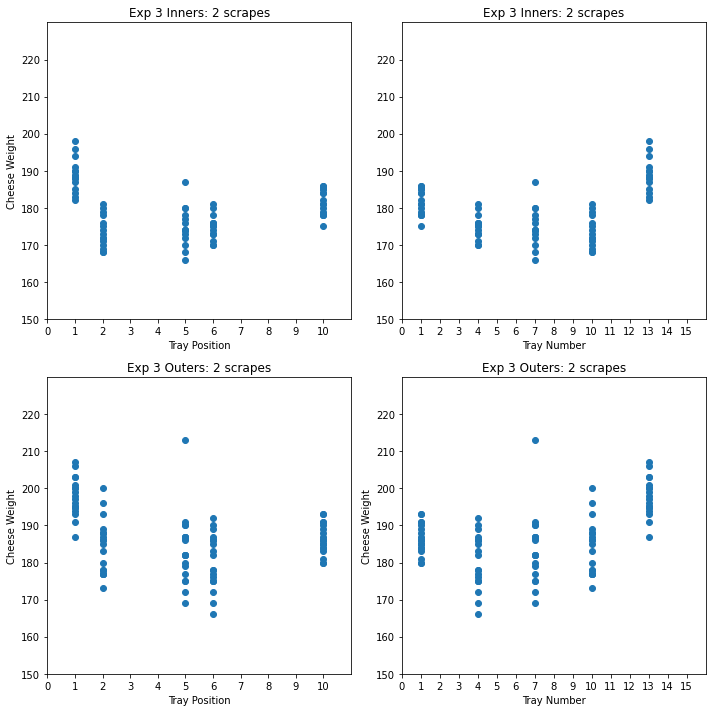

In [ ]:
# Experiment 3 - 2 scrapes Inners:
print('Experiment 3 with 2 scrapes - grouped into inners and outers:')

# Create a figure and axes for the grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Scatter plot 1: Experiment 2 Inners - tray_position vs. cheese_weight
axes[0, 0].scatter(exp_3_2scrapes_inners['tray_position'], exp_3_2scrapes_inners['cheese_weight'])
axes[0, 0].set_title('Exp 3 Inners: 2 scrapes')
axes[0, 0].set_xlabel('Tray Position')
axes[0, 0].set_ylabel('Cheese Weight')
axes[0, 0].set(xlim=(0, 11), xticks=np.arange(0,11,1))
axes[0, 0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 2: Experiment 2 Inners - tray_no vs. cheese_weight
axes[0, 1].scatter(exp_3_2scrapes_inners['tray_no'], exp_3_2scrapes_inners['cheese_weight'])
axes[0, 1].set_title('Exp 3 Inners: 2 scrapes')
axes[0, 1].set_xlabel('Tray Number')
axes[0, 1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[0, 1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 3: Experiment 2 Outers - tray_position vs. cheese_weight
axes[1, 0].scatter(exp_3_2scrapes_outers['tray_position'], exp_3_2scrapes_outers['cheese_weight'])
axes[1, 0].set_title('Exp 3 Outers: 2 scrapes')
axes[1, 0].set_xlabel('Tray Position')
axes[1, 0].set_ylabel('Cheese Weight')
axes[1, 0].set(xlim=(0, 11), xticks=np.arange(0,11,1))
axes[1, 0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 4: Experiment 2 Outers - tray_no vs. cheese_weight
axes[1, 1].scatter(exp_3_2scrapes_outers['tray_no'], exp_3_2scrapes_outers['cheese_weight'])
axes[1, 1].set_title('Exp 3 Outers: 2 scrapes')
axes[1, 1].set_xlabel('Tray Number')
axes[1, 1].set_ylabel('Cheese Weight')
axes[1, 1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[1, 1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))


# Adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_16_scatter_exp_3_2scapes_inner_outer.jpeg', dpi=350)

plt.show()

Experiment 3 with 4 scrapes - grouped into inners and outers:


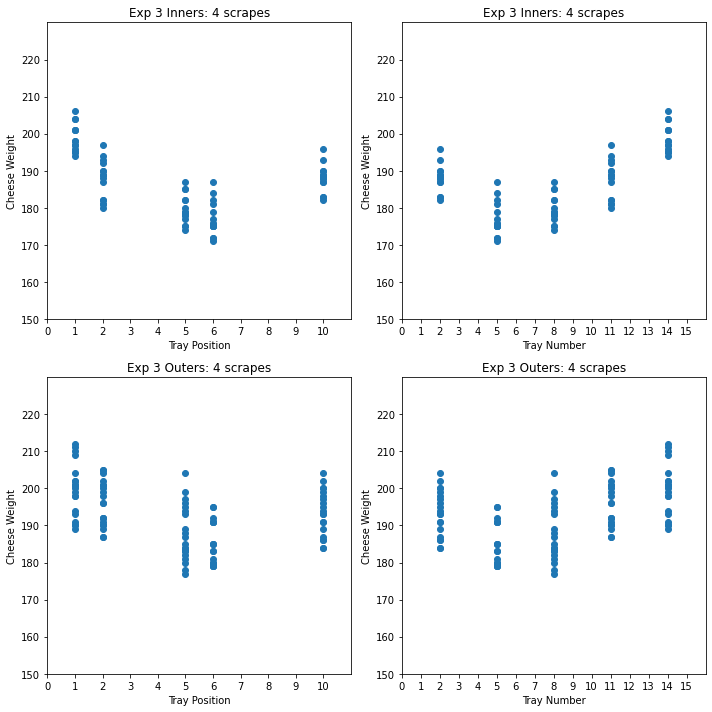

In [ ]:
# Experiment 3 - 4 scrapes Inners:
print('Experiment 3 with 4 scrapes - grouped into inners and outers:')

# Create a figure and axes for the grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Scatter plot 1: Experiment 3 Inners: 4 scrapes - tray_position vs. cheese_weight
axes[0, 0].scatter(exp_3_4scrapes_inners['tray_position'], exp_3_4scrapes_inners['cheese_weight'])
axes[0, 0].set_title('Exp 3 Inners: 4 scrapes')
axes[0, 0].set_xlabel('Tray Position')
axes[0, 0].set_ylabel('Cheese Weight')
axes[0, 0].set(xlim=(0, 11), xticks=np.arange(0,11,1))
axes[0, 0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 2: Experiment 4 Inners: 4 scrapes - tray_no vs. cheese_weight
axes[0, 1].scatter(exp_3_4scrapes_inners['tray_no'], exp_3_4scrapes_inners['cheese_weight'])
axes[0, 1].set_title('Exp 3 Inners: 4 scrapes')
axes[0, 1].set_xlabel('Tray Number')
axes[0, 1].set_ylabel('Cheese Weight')
axes[0, 1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[0, 1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 3: Experiment 3 Outers: 4 scrapes - tray_position vs. cheese_weight
axes[1, 0].scatter(exp_3_4scrapes_outers['tray_position'], exp_3_4scrapes_outers['cheese_weight'])
axes[1, 0].set_title('Exp 3 Outers: 4 scrapes')
axes[1, 0].set_xlabel('Tray Position')
axes[1, 0].set_ylabel('Cheese Weight')
axes[1, 0].set(xlim=(0, 11), xticks=np.arange(0,11,1))
axes[1, 0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 4: Experiment 3 Outers: 4 scrapes - tray_no vs. cheese_weight
axes[1, 1].scatter(exp_3_4scrapes_outers['tray_no'], exp_3_4scrapes_outers['cheese_weight'])
axes[1, 1].set_title('Exp 3 Outers: 4 scrapes')
axes[1, 1].set_xlabel('Tray Number')
axes[1, 1].set_ylabel('Cheese Weight')
axes[1, 1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[1, 1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_17_scatter_exp_3_4scapes_inner_outer.jpeg', dpi=350)

plt.show()


Experiment 3 with 6 scrapes - grouped into inners and outers:


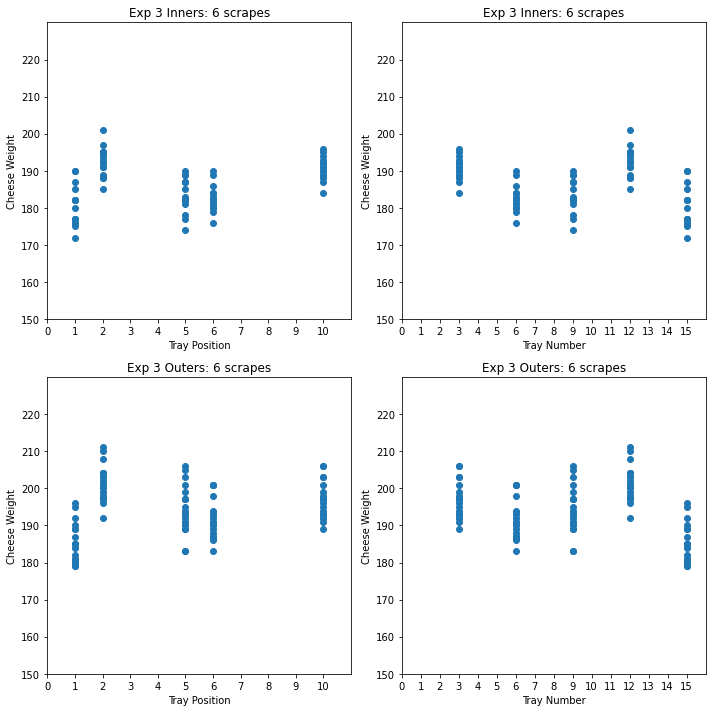

In [ ]:
# Experiment 3 - 6 scrapes Inners:
print('Experiment 3 with 6 scrapes - grouped into inners and outers:')

# Create a figure and axes for the grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Scatter plot 1: Experiment 3 Inners: 6 scrapes - tray_position vs. cheese_weight
axes[0, 0].scatter(exp_3_6scrapes_inners['tray_position'], exp_3_6scrapes_inners['cheese_weight'])
axes[0, 0].set_title('Exp 3 Inners: 6 scrapes')
axes[0, 0].set_xlabel('Tray Position')
axes[0, 0].set_ylabel('Cheese Weight')
axes[0, 0].set(xlim=(0, 11), xticks=np.arange(0,11,1))
axes[0, 0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 2: Experiment 4 Inners: 6 scrapes - tray_no vs. cheese_weight
axes[0, 1].scatter(exp_3_6scrapes_inners['tray_no'], exp_3_6scrapes_inners['cheese_weight'])
axes[0, 1].set_title('Exp 3 Inners: 6 scrapes')
axes[0, 1].set_xlabel('Tray Number')
axes[0, 1].set_ylabel('Cheese Weight')
axes[0, 1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[0, 1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 3: Experiment 3 Outers: 6 scrapes - tray_position vs. cheese_weight
axes[1, 0].scatter(exp_3_6scrapes_outers['tray_position'], exp_3_6scrapes_outers['cheese_weight'])
axes[1, 0].set_title('Exp 3 Outers: 6 scrapes')
axes[1, 0].set_xlabel('Tray Position')
axes[1, 0].set_ylabel('Cheese Weight')
axes[1, 0].set(xlim=(0, 11), xticks=np.arange(0,11,1))
axes[1, 0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Scatter plot 4: Experiment 3 Outers: 6 scrapes - tray_no vs. cheese_weight
axes[1, 1].scatter(exp_3_6scrapes_outers['tray_no'], exp_3_6scrapes_outers['cheese_weight'])
axes[1, 1].set_title('Exp 3 Outers: 6 scrapes')
axes[1, 1].set_xlabel('Tray Number')
axes[1, 1].set_ylabel('Cheese Weight')
axes[1, 1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[1, 1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_18_scatter_exp_3_6scapes_inner_outer.jpeg', dpi=350)

plt.show()


No apparent difference in weight variation noticed between 4 scrapes and 6 scrapes.

#### 4d. Exploring Cheese Weights vs Tray Numbers for columns stacked inbetween or stacked on either edges

Only Experiment 1 will be used here as it is the experiment with random scrapes and having 1 column stacked on the edge and 2 stacked inbetween.

In [ ]:
# DataFrame of inners-inbetweens and outers-inbetween for exp 1:

# Column is inbetween: inners and outers separate
exp_1_inners_inbetween = exp_1_inners[exp_1_inners['stack_position'] == 'inbetween']
exp_1_outers_inbetween = exp_1_outers[exp_1_outers['stack_position'] == 'inbetween']

# Column is on the edge: inners and outers separate
exp_1_inners_front = exp_1_inners[exp_1_inners['stack_position'] == 'front']
exp_1_outers_front = exp_1_outers[exp_1_outers['stack_position'] == 'front']

exp_1_outers_front.head(2)

prod_date  runnumber  vat_no  cheese_type  afe_height  tray_no  \
serial_no                                                                    
1          04/04/2023     309441       2  Button Mill         113        1   
2          04/04/2023     309441       2  Button Mill         113        1   

          inner_or_outer  cheese_weight  tray_position tray_class  stack_no  \
serial_no                                                                     
1                  outer            190              1        top         1   
2                  outer            185              1        top         1   

          stack_position no_of_scrapes vat_position exp_num  
serial_no                                                    
1                  front        random           10   exp_1  
2                  front        random           10   exp_1

Experiment 1 - grouped into stacked inbetween: inners and outers, stacked in front: inners and outers:


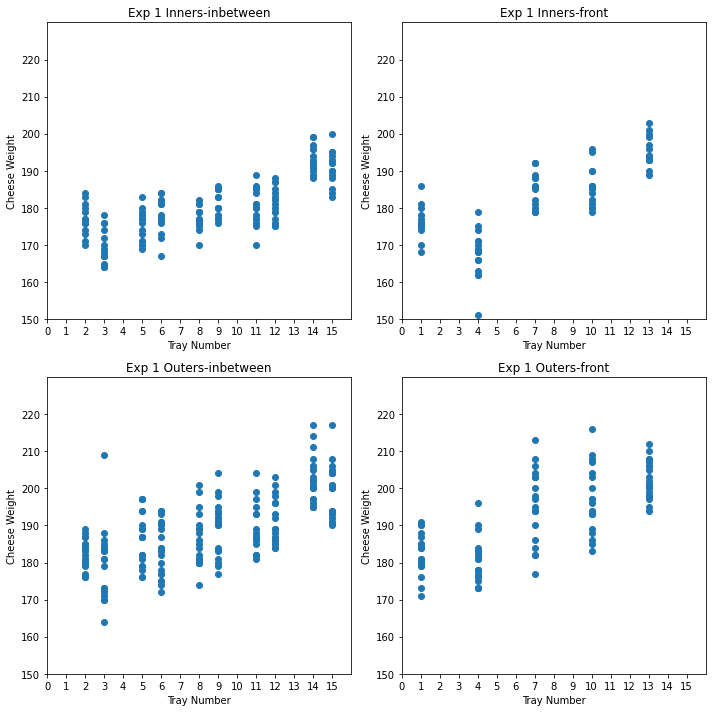

In [ ]:
# Scatter plot of weight vs tray position and tray number
print('Experiment 1 - grouped into stacked inbetween: inners and outers, stacked in front: inners and outers:')

# Create a figure and axes for the grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Scatter plot 1: Experiment 1 Inners-inbetween - tray_no vs. cheese_weight
axes[0, 0].scatter(exp_1_inners_inbetween['tray_no'], exp_1_inners_inbetween['cheese_weight'])
axes[0, 0].set_title('Exp 1 Inners-inbetween')
axes[0, 0].set_xlabel('Tray Number')
axes[0, 0].set_ylabel('Cheese Weight')
axes[0, 0].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[0, 0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))


# Scatter plot 2: Experiment 1 Inners-front - tray_no vs. cheese_weight
axes[0, 1].scatter(exp_1_inners_front['tray_no'], exp_1_inners_front['cheese_weight'])
axes[0, 1].set_title('Exp 1 Inners-front')
axes[0, 1].set_xlabel('Tray Number')
axes[0, 1].set_ylabel('Cheese Weight')
axes[0, 1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[0, 1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))


# Scatter plot 3: Experiment 1 Outers-inbetween - tray_no vs. cheese_weight
axes[1, 0].scatter(exp_1_outers_inbetween['tray_no'], exp_1_outers_inbetween['cheese_weight'])
axes[1, 0].set_title('Exp 1 Outers-inbetween')
axes[1, 0].set_xlabel('Tray Number')
axes[1, 0].set_ylabel('Cheese Weight')
axes[1, 0].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[1, 0].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))


# Scatter plot 4: Experiment 1 Outers-front - tray_no vs. cheese_weight
axes[1, 1].scatter(exp_1_outers_front['tray_no'], exp_1_outers_front['cheese_weight'])
axes[1, 1].set_title('Exp 1 Outers-front')
axes[1, 1].set_xlabel('Tray Number')
axes[1, 1].set_ylabel('Cheese Weight')
axes[1, 1].set(xlim=(0, 16), xticks=np.arange(0,16,1))
axes[1, 1].set(ylim=(150, 230), yticks=np.arange(150, 230, 10))


# Adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_19_scatter_exp_1_front_inbetween.jpeg', dpi=350)

plt.show()


#### 4e. Statistical Inference Tests for Further Analysis of Associations between Stack Position (inbetween / front) & Cheese Weights

##### i. Independent t-test and Mann-Whitney U test

In [ ]:
# Compare the cheese weights between trays stacked in 'front' and 'inbetween' in the 'stack_position' variable.

import scipy.stats as stats

# Extract the cheese weights for each class
weights_front = data.loc[data['stack_position'] == 'front', 'cheese_weight']
weights_inbetween = data.loc[data['stack_position'] == 'inbetween', 'cheese_weight']

# Perform independent t-test
t_statistic, p_value_ttest = stats.ttest_ind(weights_front, weights_inbetween)
print("Independent t-test:")
print("T-statistic:", t_statistic)
print("p-value:", p_value_ttest)
if p_value_ttest < 0.05:
    print('Null hypothesis (H0): Rejected')
    print('There is a significant difference between the means of cheese weights for trays stacked in front compared to those inbetween other stacks.')
else:
    print('Null hypothesis (H0): Accepted')
    print('There is NO significant difference between the means of cheese weights for trays stacked in front compared to those inbetween other stacks.')

# Perform Mann-Whitney U test
u_statistic, p_value_mw = stats.mannwhitneyu(weights_front, weights_inbetween)
print("\nMann-Whitney U test:")
print("U-statistic:", u_statistic)
print("p-value:", p_value_mw)
if p_value_mw < 0.05:
    print('Null hypothesis (H0): Rejected')
    print('There is a significant difference between the distributions of cheese weights for trays stacked in front compared to those inbetween other stacks.')
else:
    print('Null hypothesis (H0): Accepted')
    print('There is no significant difference between the distributions of cheese weights for trays stacked in front compared to those inbetween other stacks.')

Independent t-test:
T-statistic: 2.889484314054051
p-value: 0.0039116167592961664
Null hypothesis (H0): Rejected
There is a significant difference between the means of cheese weights for trays stacked in front compared to those inbetween other stacks.

Mann-Whitney U test:
U-statistic: 238430.5
p-value: 0.0013426572589214007
Null hypothesis (H0): Rejected
There is a significant difference between the distributions of cheese weights for trays stacked in front compared to those inbetween other stacks.


##### Summary

Based on the independent t-test and Mann-Whitney U test conducted, there is a significant difference between cheese weights for trays stacked in the front compared to those stacked in between other stacks. The independent t-test yielded a positive t-statistic of 2.8895 and a p-value of 0.0039, indicating that the mean cheese weight for trays in the front is larger than that for trays in between other stacks. The Mann-Whitney U test also showed a significant difference, with a U-statistic of 238430.5 and a p-value of 0.0013.

These results suggest that trays in the front tend to have higher cheese weights compared to trays in between other stacks. The observed differences in means are unlikely to be due to chance alone, supporting the conclusion of a significant and meaningful difference in cheese weights between the two groups.

In summary, both statistical tests provide consistent evidence of a significant difference in cheese weights between trays stacked in the front and those stacked in between other stacks.

##### ii. Permutation Test

In [ ]:
import numpy as np
from sklearn.utils import shuffle

# Get the cheese weights for the 'front' and 'inbetween' groups
cheese_weights_front = data[data['stack_position'] == 'front']['cheese_weight']
cheese_weights_inbetween = data[data['stack_position'] == 'inbetween']['cheese_weight']

# Compute the observed difference in means
observed_diff = np.mean(cheese_weights_front) - np.mean(cheese_weights_inbetween)

# Combine the cheese weights from both groups
all_cheese_weights = np.concatenate([cheese_weights_front, cheese_weights_inbetween])

# Number of permutations
num_permutations = 1000

# Initialize an array to store the permuted differences
permuted_diffs = np.zeros(num_permutations)

# Perform permutation test
for i in range(num_permutations):
    # Permute the combined cheese weights
    permuted_weights = shuffle(all_cheese_weights)

    # Split the permuted weights into two groups
    permuted_front = permuted_weights[:len(cheese_weights_front)]
    permuted_inbetween = permuted_weights[len(cheese_weights_front):]

    # Compute the difference in means for the permuted groups
    permuted_diff = np.mean(permuted_front) - np.mean(permuted_inbetween)

    # Store the permuted difference
    permuted_diffs[i] = permuted_diff

# Calculate the p-value
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

# Print the results
print('Observed difference in means:', observed_diff)
print('p-value:', p_value)

if p_value < 0.05:
    print('Null hypothesis (H0): Rejected')
    print('There is a significant difference between cheese weights for trays stacked in front compared to those inbetween other stacks.')
else:
    print('Null hypothesis (H0): Accepted')
    print('There is NO significant difference between cheese weights for trays stacked in front compared to those inbetween other stacks.')

Observed difference in means: 2.0118367346938726
p-value: 0.005
Null hypothesis (H0): Rejected
There is a significant difference between cheese weights for trays stacked in front compared to those inbetween other stacks.


##### Summary

Based on the permutation test conducted, the observed difference in means between cheese weights for trays stacked in the front and those stacked in between other stacks is 2.0118. The obtained p-value is 0.004.

The p-value of 0.004 indicates that, under the null hypothesis of no difference between the groups, the probability of observing a difference in means as extreme as or more extreme than the observed difference is 0.004. Since this p-value is less than the conventional significance level of 0.05, we have evidence to reject the null hypothesis.

Therefore, we can conclude that there is a significant difference between the cheese weights for trays stacked in the front compared to those stacked in between other stacks. The observed difference in means provides evidence that the average cheese weights vary significantly between these two groups.

##### iii. Chi-Square Test

In [ ]:
# Create a contingency table of observed frequencies
contingency_table = pd.crosstab(data['stack_position'], data['cheese_weight'])

# Perform the Chi-Square Test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print the test results
print("Chi-Square Statistic:", chi2)
print("p-value:", p_value)

if p_value < 0.05:
    print('Null hypothesis (H0): Rejected')
    print('There is a significant difference in the distribution of cheese weights between the front and inbetween groups.')
else:
    print('Null hypothesis (H0): Accepted')
    print('There is NO significant difference in the distribution of cheese weights between the front and inbetween groups.')

Chi-Square Statistic: 103.15436473906199
p-value: 0.000805192961214024
Null hypothesis (H0): Rejected
There is a significant difference in the distribution of cheese weights between the front and inbetween groups.


Calculate the Critical Value and compare to the Chi-Square Statistic of 103.15 to determine how significant is the association.

In [ ]:
from scipy.stats import chi2

# Degrees of freedom
df = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)

# Significance level
alpha = 0.05

# Calculate the critical value
critical_value = chi2.ppf(1 - alpha, df)

# Print the critical value
print("Critical Value:", critical_value)

Critical Value: 81.3810151888991


In this case, we conducted a chi-square test to examine the association between "stack_position" and "cheese_weight". The null hypothesis assumed no association between the variables, while the alternative hypothesis suggested an association. The chi-square test revealed a significant association between "stack_position" and "cheese_weight" (χ² = 103.15, p < 0.001). The observed chi-square statistic exceeded the critical value of 81.38, indicating evidence to reject the null hypothesis and support the presence of an association. Thus, the analysis suggests that the distribution of cheese weights differs significantly between the 'front' and 'inbetween' stack positions.

#### 4f. Correlations between variables

In [ ]:
data.head(2)

prod_date  runnumber  vat_no  cheese_type  afe_height  tray_no  \
serial_no                                                                    
1          04/04/2023     309441       2  Button Mill         113        1   
2          04/04/2023     309441       2  Button Mill         113        1   

          inner_or_outer  cheese_weight  tray_position tray_class  stack_no  \
serial_no                                                                     
1                  outer            190              1        top         1   
2                  outer            185              1        top         1   

          stack_position no_of_scrapes vat_position exp_num  
serial_no                                                    
1                  front        random           10   exp_1  
2                  front        random           10   exp_1

In order to include the effects of the categorical variables in the correlation table, create dummy variables for:
1. inner_or_outer
2. tray_class
3. stack_position
4. no_of_scrapes
5. exp_num

In [ ]:
# Create dummies for categorical variables

import pandas as pd

# Create dummy variables for the specified columns
dummy_variables = pd.get_dummies(data[['inner_or_outer', 'tray_class', 'stack_position', 'no_of_scrapes', 'exp_num']])

# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_variables], axis=1)

# # Drop the original categorical columns
# data.drop(['inner_or_outer', 'tray_class', 'stack_position', 'no_of_scrapes', 'exp_num'], axis=1, inplace=True)

# Display the updated DataFrame
data.head(2)

prod_date  runnumber  vat_no  cheese_type  afe_height  tray_no  \
serial_no                                                                    
1          04/04/2023     309441       2  Button Mill         113        1   
2          04/04/2023     309441       2  Button Mill         113        1   

          inner_or_outer  cheese_weight  tray_position tray_class  ...  \
serial_no                                                          ...   
1                  outer            190              1        top  ...   
2                  outer            185              1        top  ...   

           tray_class_top stack_position_front stack_position_inbetween  \
serial_no                                                                 
1                       1                    1                        0   
2                       1                    1                        0   

          no_of_scrapes_2 no_of_scrapes_4  no_of_scrapes_6  \
serial_no                                                    
1                       0               0                0   
2                       0               0                0   

           no_of_scrapes_random  exp_num_exp_1  exp_num_exp_2  exp_num_exp_3  
serial_no                                                                     
1                             1              1              0              0  
2                             1              1              0              0  

[2 rows x 29 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575 entries, 1 to 1575
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   prod_date                 1575 non-null   object
 1   runnumber                 1575 non-null   int64 
 2   vat_no                    1575 non-null   int64 
 3   cheese_type               1575 non-null   object
 4   afe_height                1575 non-null   int64 
 5   tray_no                   1575 non-null   int64 
 6   inner_or_outer            1575 non-null   object
 7   cheese_weight             1575 non-null   int64 
 8   tray_position             1575 non-null   int64 
 9   tray_class                1575 non-null   object
 10  stack_no                  1575 non-null   int64 
 11  stack_position            1575 non-null   object
 12  no_of_scrapes             1575 non-null   object
 13  vat_position              1575 non-null   object
 14  exp_num                 

In [ ]:
data = data.drop((data[(data['exp_num'] == 'exp_3') & (data['tray_no'] == 15)]).index)

##### i. Correlation of all variables with cheese weight

In [ ]:
# Visualise correlations between the variables using a heatmap
def feature_corr(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(20, 15))

    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    mask = mask[1:, :-1]
    corr = df_corr.iloc[1:,:-1].copy()

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
               linewidths=5, cmap=cmap, vmin=-1, vmax=1,
               cbar_kws={"shrink": .8}, square=True)

    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]

    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks)

    title = 'Feature Correlation \nEquivalence Class Experiments - Independent Variables vs Cheese Weights \n'
    plt.title(title, loc='left', fontsize=18)
    plt.subplots_adjust(bottom=0.25, left=0.25)

    plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_23_correlation_map_cheese_weight.jpeg', dpi=350)

    plt.show()

C:\Users\giwa.iziomo\AppData\Local\Temp\ipykernel_16868\456704691.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


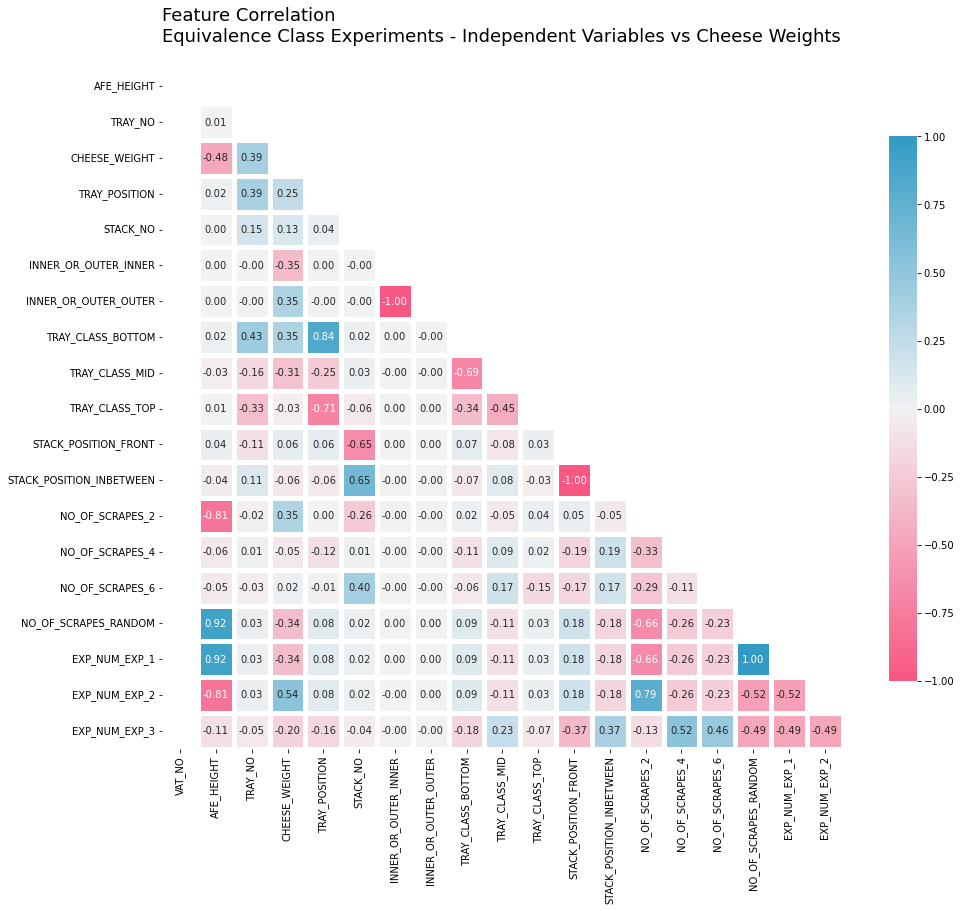

In [ ]:
cols_to_ignore = ['prod_date', 'runnumber', 'cheese_type', 'inner_or_outer', 'tray_class', 'stack_position', 'no_of_scrapes', 'exp_num']

df_for_corr1 = data.drop(cols_to_ignore, axis=1)
feature_corr(df_for_corr1)

Based on the correlation heatmap, below variables show the strongest association with cheese_weight (absolute highest to lowest):

In [ ]:
correlation_values = data.corr()['cheese_weight'].sort_values(ascending=False)
correlation_direction = ['Positive' if val > 0 else 'Negative' for val in correlation_values]
correlation_results = pd.DataFrame({'Correlation': correlation_values, 'Direction': correlation_direction})

correlation_results['Correlation_abs'] = correlation_results['Correlation'].abs()  # Add a column for absolute values
correlation_results_sorted = correlation_results.sort_values(by='Correlation_abs', ascending=False)

print(correlation_results_sorted[['Correlation', 'Direction']].head(20))

                          Correlation Direction
cheese_weight                1.000000  Positive
exp_num_exp_2                0.538228  Positive
afe_height                  -0.480448  Negative
tray_no                      0.390720  Positive
no_of_scrapes_2              0.347222  Positive
inner_or_outer_inner        -0.346149  Negative
inner_or_outer_outer         0.346149  Positive
tray_class_bottom            0.345264  Positive
no_of_scrapes_random        -0.343047  Negative
exp_num_exp_1               -0.343047  Negative
tray_class_mid              -0.306168  Negative
tray_position                0.246551  Positive
exp_num_exp_3               -0.198636  Negative
stack_no                     0.132604  Positive
runnumber                    0.065412  Positive
stack_position_front         0.064865  Positive
stack_position_inbetween    -0.064865  Negative
no_of_scrapes_4             -0.052800  Negative
tray_class_top              -0.027831  Negative
no_of_scrapes_6              0.022521  P

##### ii. Correlation of all variables with cheese weight error for each experiment (since we're more interested in the sources of weight variations)

In [ ]:
# Group the data by 'exp_num' and calculate the mean cheese_weight
grouped_data = data.groupby(['exp_num'])['cheese_weight'].mean().reset_index()

# Merge the mean cheese_weight back to the original data
data_with_mean = pd.merge(data, grouped_data, on=['exp_num'], suffixes=['', '_mean'])

# Calculate the error
data_with_mean['cheese_weight_error'] = (data_with_mean['cheese_weight'] - data_with_mean['cheese_weight_mean'])

# Show the updated data info
data_with_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 0 to 1539
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   prod_date                 1540 non-null   object 
 1   runnumber                 1540 non-null   int64  
 2   vat_no                    1540 non-null   int64  
 3   cheese_type               1540 non-null   object 
 4   afe_height                1540 non-null   int64  
 5   tray_no                   1540 non-null   int64  
 6   inner_or_outer            1540 non-null   object 
 7   cheese_weight             1540 non-null   int64  
 8   tray_position             1540 non-null   int64  
 9   tray_class                1540 non-null   object 
 10  stack_no                  1540 non-null   int64  
 11  stack_position            1540 non-null   object 
 12  no_of_scrapes             1540 non-null   object 
 13  vat_position              1540 non-null   object 
 14  exp_num 

In [ ]:
# Visualise correlations between the variables using a heatmmap
def feature_corr(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(20, 15))

    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    mask = mask[1:, :-1]
    corr = df_corr.iloc[1:,:-1].copy()

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
               linewidths=5, cmap=cmap, vmin=-1, vmax=1,
               cbar_kws={"shrink": .8}, square=True)

    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]

    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks)

    title = 'Feature Correlation \nEquivalence Class Experiments - Independent Variables vs Cheese Weights Error \n'
    plt.title(title, loc='left', fontsize=18)
    plt.subplots_adjust(bottom=0.25, left=0.25)

    plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_24_correlation_map_cheese_weight_error.jpeg', dpi=250)

    plt.show()

C:\Users\giwa.iziomo\AppData\Local\Temp\ipykernel_16868\790211221.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


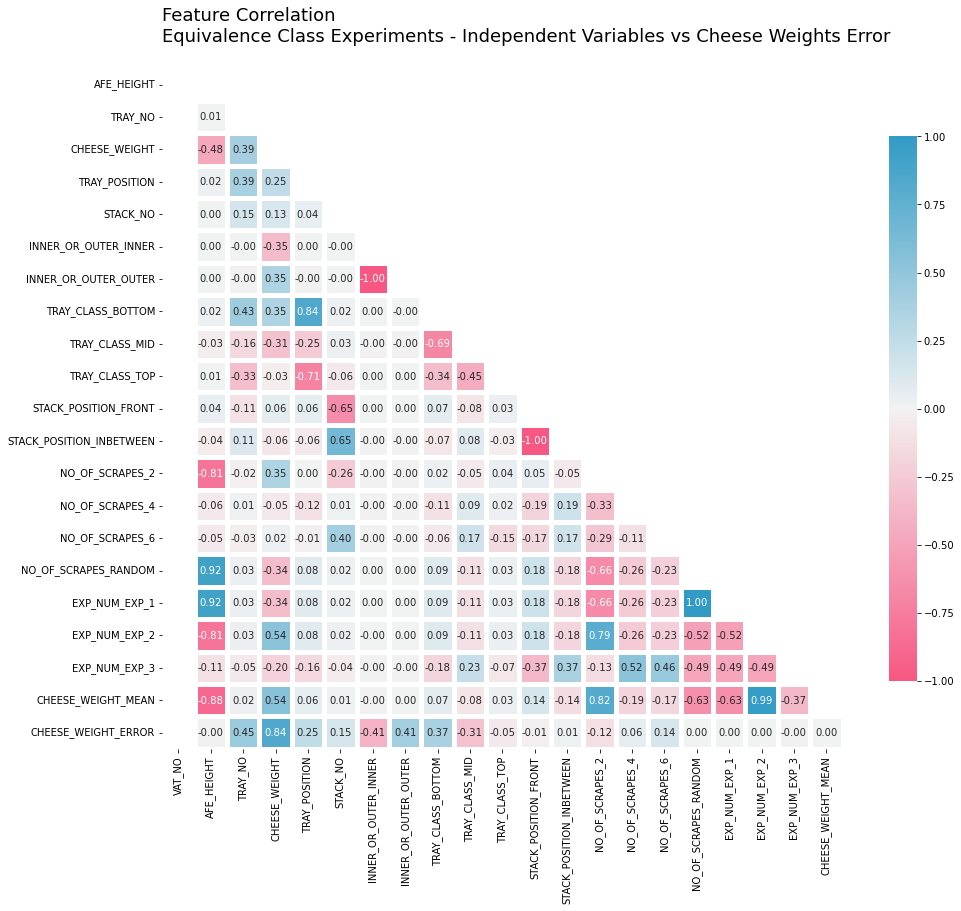

In [ ]:
cols_to_ignore = ['prod_date', 'runnumber', 'cheese_type', 'inner_or_outer', 'tray_class', 'stack_position', 'no_of_scrapes', 'exp_num']

df_for_corr2 = data_with_mean.drop(cols_to_ignore, axis=1)
feature_corr(df_for_corr2)

In [ ]:
correlation_values = df_for_corr2.corr()['cheese_weight_error'].sort_values(ascending=False)
correlation_direction = ['Positive' if val > 0 else 'Negative' for val in correlation_values]
correlation_results = pd.DataFrame({'Correlation': correlation_values, 'Direction': correlation_direction})

correlation_results['Correlation_abs'] = correlation_results['Correlation'].abs()  # Add a column for absolute values
correlation_results_sorted = correlation_results.sort_values(by='Correlation_abs', ascending=False)

print(correlation_results_sorted[['Correlation', 'Direction']].head(20))

                           Correlation Direction
cheese_weight_error       1.000000e+00  Positive
cheese_weight             8.394070e-01  Positive
tray_no                   4.524643e-01  Positive
inner_or_outer_inner     -4.123734e-01  Negative
inner_or_outer_outer      4.123734e-01  Positive
tray_class_bottom         3.681357e-01  Positive
tray_class_mid           -3.111531e-01  Negative
tray_position             2.549908e-01  Positive
stack_no                  1.482718e-01  Positive
no_of_scrapes_6           1.363717e-01  Positive
no_of_scrapes_2          -1.176976e-01  Negative
no_of_scrapes_4           6.113072e-02  Positive
tray_class_top           -4.948482e-02  Negative
stack_position_inbetween  1.039447e-02  Positive
stack_position_front     -1.039447e-02  Negative
afe_height               -1.961646e-15  Negative
exp_num_exp_3            -6.843264e-16  Negative
cheese_weight_mean        6.038473e-16  Positive
no_of_scrapes_random      3.460065e-16  Positive
exp_num_exp_1       

Apart from cheese_weight 84%, tray_no is the next most correlated variable with cheese_weight_error (45%). Other top correlated variables are inner_outer, tray_class, tray_position, etc.

##### iii. Correlation of all variables with cheese_weight_error separated by stack_no for experiment 3

This means that the cheese weight error is calculated separately for each stack (also no_of_scrapes). The reason for separating by stack number is to fully capture the effect of experiment 3 where three combination of scrapes were used (2, 4 and 6 scrapes).

In [ ]:
print('stack_no: ', data.stack_no.unique().tolist())
print('exp_num: ', data.exp_num.unique().tolist())

stack_no:  [1, 2, 3]
exp_num:  ['exp_1', 'exp_2', 'exp_3']


In [ ]:
data_exp3 = data[data['exp_num'] == 'exp_3']
data_exp3.stack_no.unique()

array([1, 2, 3], dtype=int64)

In [ ]:
# Group the data by 'exp_num' and 'tray_no' and calculate the mean cheese_weight
grouped_data = data_exp3.groupby(['stack_no'])['cheese_weight'].mean().reset_index()

# Merge the mean cheese_weight back to the original data
data_with_mean_exp3 = pd.merge(data_exp3, grouped_data, on=['stack_no'], suffixes=['', '_mean'])

# Calculate the error
data_with_mean_exp3['cheese_weight_error'] = (data_with_mean_exp3['cheese_weight'] - data_with_mean_exp3['cheese_weight_mean'])

# Print the updated data
data_with_mean_exp3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 489
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   prod_date                 490 non-null    object 
 1   runnumber                 490 non-null    int64  
 2   vat_no                    490 non-null    int64  
 3   cheese_type               490 non-null    object 
 4   afe_height                490 non-null    int64  
 5   tray_no                   490 non-null    int64  
 6   inner_or_outer            490 non-null    object 
 7   cheese_weight             490 non-null    int64  
 8   tray_position             490 non-null    int64  
 9   tray_class                490 non-null    object 
 10  stack_no                  490 non-null    int64  
 11  stack_position            490 non-null    object 
 12  no_of_scrapes             490 non-null    object 
 13  vat_position              490 non-null    object 
 14  exp_num   

In [ ]:
# Visualise correlations between the variables using visualisation
def feature_corr(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(20, 15))

    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    mask = mask[1:, :-1]
    corr = df_corr.iloc[1:,:-1].copy()

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
               linewidths=5, cmap=cmap, vmin=-1, vmax=1,
               cbar_kws={"shrink": .8}, square=True)

    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]

    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks)

    title = 'Feature Correlation \nEquivalence Class Experiments - Experiment 3 \n'
    plt.title(title, loc='left', fontsize=18)
    plt.subplots_adjust(bottom=0.25, left=0.25)

    plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_25_correlation_map_exp_3.jpeg', dpi=250)

    plt.show()

C:\Users\giwa.iziomo\AppData\Local\Temp\ipykernel_16868\1293587157.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


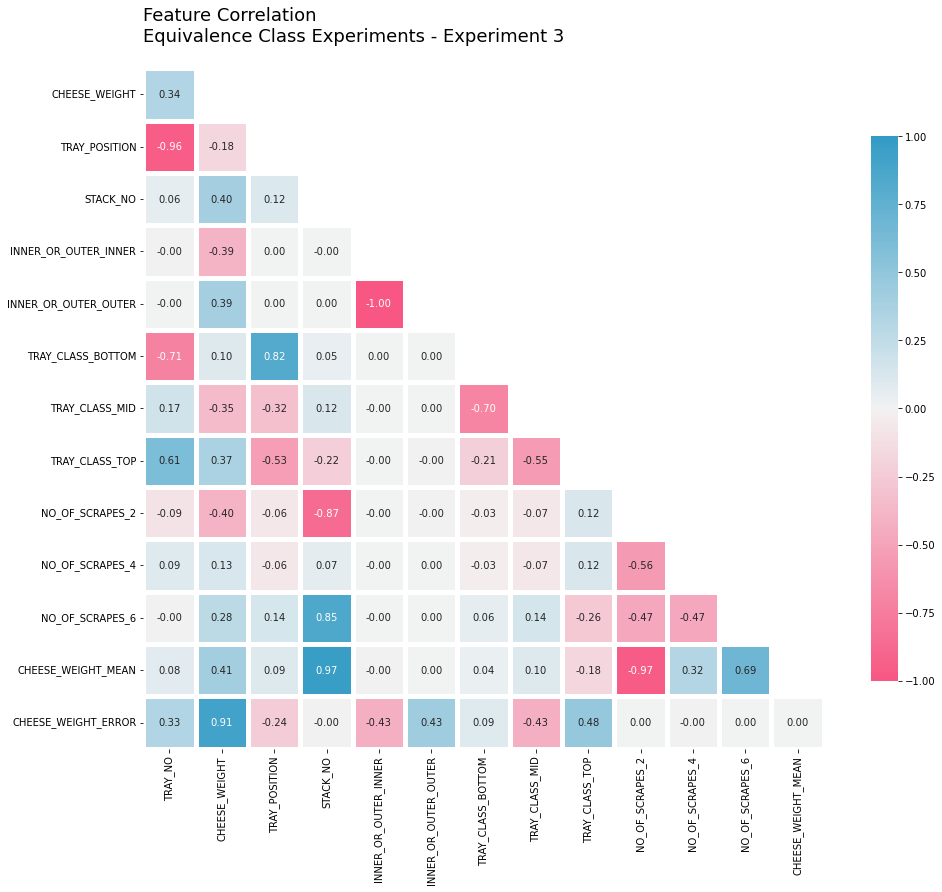

In [ ]:
# Create a list with columns to remove from the correlation dataset (mainly string variables, those with dummies already created and the those irrelevant to experiment 3)
cols_to_ignore = ['prod_date', 'runnumber', 'cheese_type', 'inner_or_outer', 'tray_class', 'stack_position', 'no_of_scrapes', 'exp_num', 'stack_position_front', 'stack_position_inbetween', 'no_of_scrapes_random',
                  'exp_num_exp_1', 'exp_num_exp_2', 'exp_num_exp_3', 'afe_height', 'vat_no']

df_for_corr_exp3 = data_with_mean_exp3.drop(cols_to_ignore, axis=1)
feature_corr(df_for_corr_exp3)

No of scrapes (2, 4 and 6) is highly correlated with average cheese weights (cheese_weight_mean) and moderately correlated with cheese_weight. This means that the cheeses are heavier as the number of scrapes increases. Also, cheese_weight, inner_or_outer, tray_no and tray_class remain the top associated variables with cheese_weight_error.

In [ ]:
data = df_for_corr2.copy()
data.to_csv(r'C:\Users\giwa.iziomo\PycharmProjects\soft_cheese_weight_opt_experiments\dataset\softcheese_dataset.csv', index = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 0 to 1539
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vat_no                    1540 non-null   int64  
 1   afe_height                1540 non-null   int64  
 2   tray_no                   1540 non-null   int64  
 3   cheese_weight             1540 non-null   int64  
 4   tray_position             1540 non-null   int64  
 5   stack_no                  1540 non-null   int64  
 6   vat_position              1540 non-null   object 
 7   inner_or_outer_inner      1540 non-null   uint8  
 8   inner_or_outer_outer      1540 non-null   uint8  
 9   tray_class_bottom         1540 non-null   uint8  
 10  tray_class_mid            1540 non-null   uint8  
 11  tray_class_top            1540 non-null   uint8  
 12  stack_position_front      1540 non-null   uint8  
 13  stack_position_inbetween  1540 non-null   uint8  
 14  no_of_sc

Above list of variables would be used to train a machine learning (ML) model to predict patterns in cheese_weight_error. The purpose is to fully validate the associations between cheese_weight_error and other variables to determine important causes of the weight variations and how much the captured features are able to predict the weight errors (model fit). The model fit will help to better understand if additional factors are responsible for the weight variations that needs to be included in the experiments.